# 0.0 Importd

In [51]:
import pandas as pd
import inflection
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

## 0.1 Loading Data

In [2]:
df_raw = pd.read_csv('../data/df_ready.csv')

In [3]:
df_raw = df_raw.drop(columns={  'Unnamed: 0', 'Date_imp', 'Cluster', 'condition', 'sourceURLs', 'Date_imp_d.1', 
                                'Zscore_1', 'price_std', 'imageURLs', 'shipping', 'weight', 'currency'})

In [4]:
df_raw.head()

Date_imp_d                 Category_name  \
0  2017/12/14  speaker, portable, bluetooth   
1  2017/09/08  speaker, portable, bluetooth   
2  2017/10/24  speaker, portable, bluetooth   
3  2017/08/15  speaker, portable, bluetooth   
4  2017/09/14  speaker, portable, bluetooth   

                                                name  price  disc_price  \
0  Boytone - 2500W 2.1-Ch. Home Theater System - ...  69.00       64.99   
1  Boytone - 2500W 2.1-Ch. Home Theater System - ...  69.00       69.00   
2  Boytone - 2500W 2.1-Ch. Home Theater System - ...  66.00       66.00   
3  Boytone - 2500W 2.1-Ch. Home Theater System - ...  74.99       74.99   
4  Boytone - 2500W 2.1-Ch. Home Theater System - ...  69.99       69.99   

      merchant  Disc_percentage isSale  Imp_count    brand  \
0  Walmart.com             0.06    Yes          1  Boytone   
1  Walmart.com             0.00     No          1  Boytone   
2  Walmart.com             0.00     No          1  Boytone   
3  Walmart.com             0.00     No          1  Boytone   
4  Walmart.com             0.00     No          1  Boytone   

                                       p_description             dateAdded  \
0  Stereos,Portable Bluetooth Speakers,TV, Video ...  2015-05-18T14:14:56Z   
1  Stereos,Portable Bluetooth Speakers,TV, Video ...  2015-05-18T14:14:56Z   
2  Stereos,Portable Bluetooth Speakers,TV, Video ...  2015-05-18T14:14:56Z   
3  Stereos,Portable Bluetooth Speakers,TV, Video ...  2015-05-18T14:14:56Z   
4  Stereos,Portable Bluetooth Speakers,TV, Video ...  2015-05-18T14:14:56Z   

               dateSeen           dateUpdated manufacturer     Day_n  month  \
0  2017-12-14T06:00:00Z  2018-06-13T19:39:02Z      Boytone  Thursday     12   
1  2017-09-08T05:00:00Z  2018-06-13T19:39:02Z      Boytone    Friday      9   
2  2017-10-24T04:00:00Z  2018-06-13T19:39:02Z      Boytone   Tuesday     10   
3  2017-08-15T15:00:00Z  2018-06-13T19:39:02Z      Boytone   Tuesday      8   
4  2017-09-14T21:00:00Z  2018-06-13T19:39:02Z      Boytone  Thursday      9   

     month_n  day  Week_Number  
0   December   14           50  
1  September    8           36  
2    October   24           43  
3     August   15           33  
4  September   14           37

# 1.0 Descrição dos Dados

In [5]:
df1 = df_raw.copy()

## 1.1 Rename Columns

In [6]:
df1.columns

Index(['Date_imp_d', 'Category_name', 'name', 'price', 'disc_price',
       'merchant', 'Disc_percentage', 'isSale', 'Imp_count', 'brand',
       'p_description', 'dateAdded', 'dateSeen', 'dateUpdated', 'manufacturer',
       'Day_n', 'month', 'month_n', 'day', 'Week_Number'],
      dtype='object')

In [7]:
cols_old = ['Date_imp_d', 'Category_name', 'name', 'price', 'disc_price', 'merchant', 'Disc_percentage', 'isSale', 'Imp_count', 
            'brand', 'p_description', 'dateAdded', 'dateSeen', 'dateUpdated', 'manufacturer', 'Day_n', 'month', 'month_n', 'day', 
            'Week_Number']

snakecase = lambda x: inflection.underscore( x )

cols_new = list( map (snakecase, cols_old) )

#Rename
df1.columns = cols_new

In [8]:
df1.columns

Index(['date_imp_d', 'category_name', 'name', 'price', 'disc_price',
       'merchant', 'disc_percentage', 'is_sale', 'imp_count', 'brand',
       'p_description', 'date_added', 'date_seen', 'date_updated',
       'manufacturer', 'day_n', 'month', 'month_n', 'day', 'week_number'],
      dtype='object')

## 1.2. Data Dimensions

In [9]:
print(f'Numero de Linhas: {df1.shape[0]}')
print(f'Numero de Colunas: {df1.shape[1]}')

Numero de Linhas: 23151
Numero de Colunas: 20


## 1.3. Data Types

In [10]:
df1.dtypes

date_imp_d          object
category_name       object
name                object
price              float64
disc_price         float64
merchant            object
disc_percentage    float64
is_sale             object
imp_count            int64
brand               object
p_description       object
date_added          object
date_seen           object
date_updated        object
manufacturer        object
day_n               object
month                int64
month_n             object
day                  int64
week_number          int64
dtype: object

## 1.4. Check NA

In [11]:
df1.isna().sum()

date_imp_d             0
category_name          0
name                   0
price                  0
disc_price             0
merchant               0
disc_percentage        0
is_sale                0
imp_count              0
brand                  0
p_description          0
date_added             0
date_seen              0
date_updated           0
manufacturer       10639
day_n                  0
month                  0
month_n                0
day                    0
week_number            0
dtype: int64

## 1.5. Change Types

In [12]:
df1['date_imp_d'] = pd.to_datetime(df1['date_imp_d'])

In [13]:
df1.dtypes

date_imp_d         datetime64[ns]
category_name              object
name                       object
price                     float64
disc_price                float64
merchant                   object
disc_percentage           float64
is_sale                    object
imp_count                   int64
brand                      object
p_description              object
date_added                 object
date_seen                  object
date_updated               object
manufacturer               object
day_n                      object
month                       int64
month_n                    object
day                         int64
week_number                 int64
dtype: object

## 1.6. Descriptive Statistical

In [14]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'])
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

### 1.6.1. Numerical Attributes

In [15]:
# Tendencia Central - media, mediana
ct1 = pd.DataFrame( num_attributes.apply( np.mean) ).T  # media
ct2 = pd.DataFrame( num_attributes.apply( np.median) ).T # mediana


# Disperção - desvio padrão, min, max, intervalo, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std) ).T                              # desvio padrão
d2 = pd.DataFrame( num_attributes.apply( min ) ).T                           # minimo
d3 = pd.DataFrame( num_attributes.apply( max ) ).T                           # maximo
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T     # intervalo
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T              # skew
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T          # kurtosis

# Concatenar os resultados
m1 = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m1.columns = ['Atributos', 'min', 'max', 'intervalo', 'media', 'mediana', 'std', 'skew', 'kurtosis']
m1

Atributos  min       max  intervalo       media  mediana         std  \
0            price  1.0  10879.95   10878.95  513.037803   199.99  859.091448   
1       disc_price  1.0  10879.95   10878.95  494.104295   199.00  808.571509   
2  disc_percentage  0.0      0.80       0.80    0.016933     0.00    0.077847   
3        imp_count  1.0     31.00      30.00    6.560926     5.00    5.403049   
4            month  1.0     12.00      11.00    7.651030     8.00    2.592787   
5              day  1.0     31.00      30.00   15.693879    16.00    9.681413   
6      week_number  1.0     51.00      50.00   31.342750    32.00   11.316253   

       skew   kurtosis  
0  4.595160  34.411146  
1  4.748349  39.612839  
2  5.217632  28.754920  
3  1.286351   1.639569  
4 -0.099417  -0.628859  
5  0.032258  -1.331838  
6 -0.266980  -0.648027

# 2.0. EDA

In [16]:
df2 = df1.copy()

In [17]:
df2.head()

date_imp_d                 category_name  \
0 2017-12-14  speaker, portable, bluetooth   
1 2017-09-08  speaker, portable, bluetooth   
2 2017-10-24  speaker, portable, bluetooth   
3 2017-08-15  speaker, portable, bluetooth   
4 2017-09-14  speaker, portable, bluetooth   

                                                name  price  disc_price  \
0  Boytone - 2500W 2.1-Ch. Home Theater System - ...  69.00       64.99   
1  Boytone - 2500W 2.1-Ch. Home Theater System - ...  69.00       69.00   
2  Boytone - 2500W 2.1-Ch. Home Theater System - ...  66.00       66.00   
3  Boytone - 2500W 2.1-Ch. Home Theater System - ...  74.99       74.99   
4  Boytone - 2500W 2.1-Ch. Home Theater System - ...  69.99       69.99   

      merchant  disc_percentage is_sale  imp_count    brand  \
0  Walmart.com             0.06     Yes          1  Boytone   
1  Walmart.com             0.00      No          1  Boytone   
2  Walmart.com             0.00      No          1  Boytone   
3  Walmart.com             0.00      No          1  Boytone   
4  Walmart.com             0.00      No          1  Boytone   

                                       p_description            date_added  \
0  Stereos,Portable Bluetooth Speakers,TV, Video ...  2015-05-18T14:14:56Z   
1  Stereos,Portable Bluetooth Speakers,TV, Video ...  2015-05-18T14:14:56Z   
2  Stereos,Portable Bluetooth Speakers,TV, Video ...  2015-05-18T14:14:56Z   
3  Stereos,Portable Bluetooth Speakers,TV, Video ...  2015-05-18T14:14:56Z   
4  Stereos,Portable Bluetooth Speakers,TV, Video ...  2015-05-18T14:14:56Z   

              date_seen          date_updated manufacturer     day_n  month  \
0  2017-12-14T06:00:00Z  2018-06-13T19:39:02Z      Boytone  Thursday     12   
1  2017-09-08T05:00:00Z  2018-06-13T19:39:02Z      Boytone    Friday      9   
2  2017-10-24T04:00:00Z  2018-06-13T19:39:02Z      Boytone   Tuesday     10   
3  2017-08-15T15:00:00Z  2018-06-13T19:39:02Z      Boytone   Tuesday      8   
4  2017-09-14T21:00:00Z  2018-06-13T19:39:02Z      Boytone  Thursday      9   

     month_n  day  week_number  
0   December   14           50  
1  September    8           36  
2    October   24           43  
3     August   15           33  
4  September   14           37

## 2.1. Qual a loja que mais vendeu?

<Axes: xlabel='merchant', ylabel='date_imp_d'>

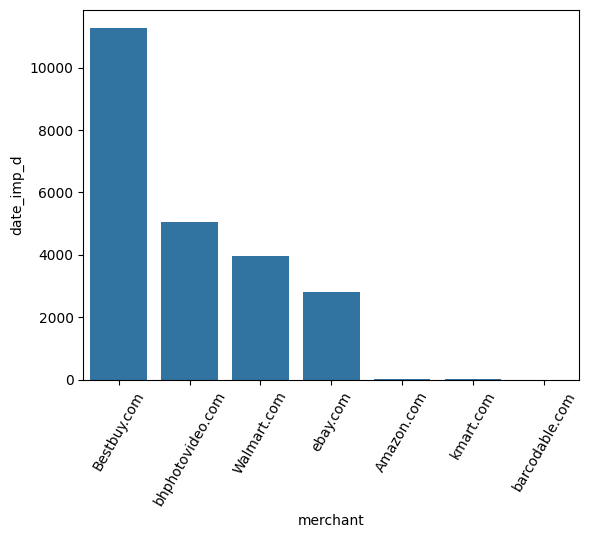

In [18]:
aux1 = df2[['date_imp_d', 'merchant']].groupby('merchant').count().reset_index().sort_values(by='date_imp_d', ascending=False)

plt.xticks(rotation=60)
sns.barplot(x='merchant', y='date_imp_d', data=aux1)

In [19]:
# seleção de lojas
df_best     = df2[df2['merchant'] == 'Bestbuy.com']
df_bhp      = df2[df2['merchant'] == 'bhphotovideo.com']
df_walmart  = df2[df2['merchant'] == 'Walmart.com']
df_ebay     = df2[df2['merchant'] == 'ebay.com']

## 2.2. Qual a categoria mais vendida?

### 2.2.1. Categoria mais vendida no geral?

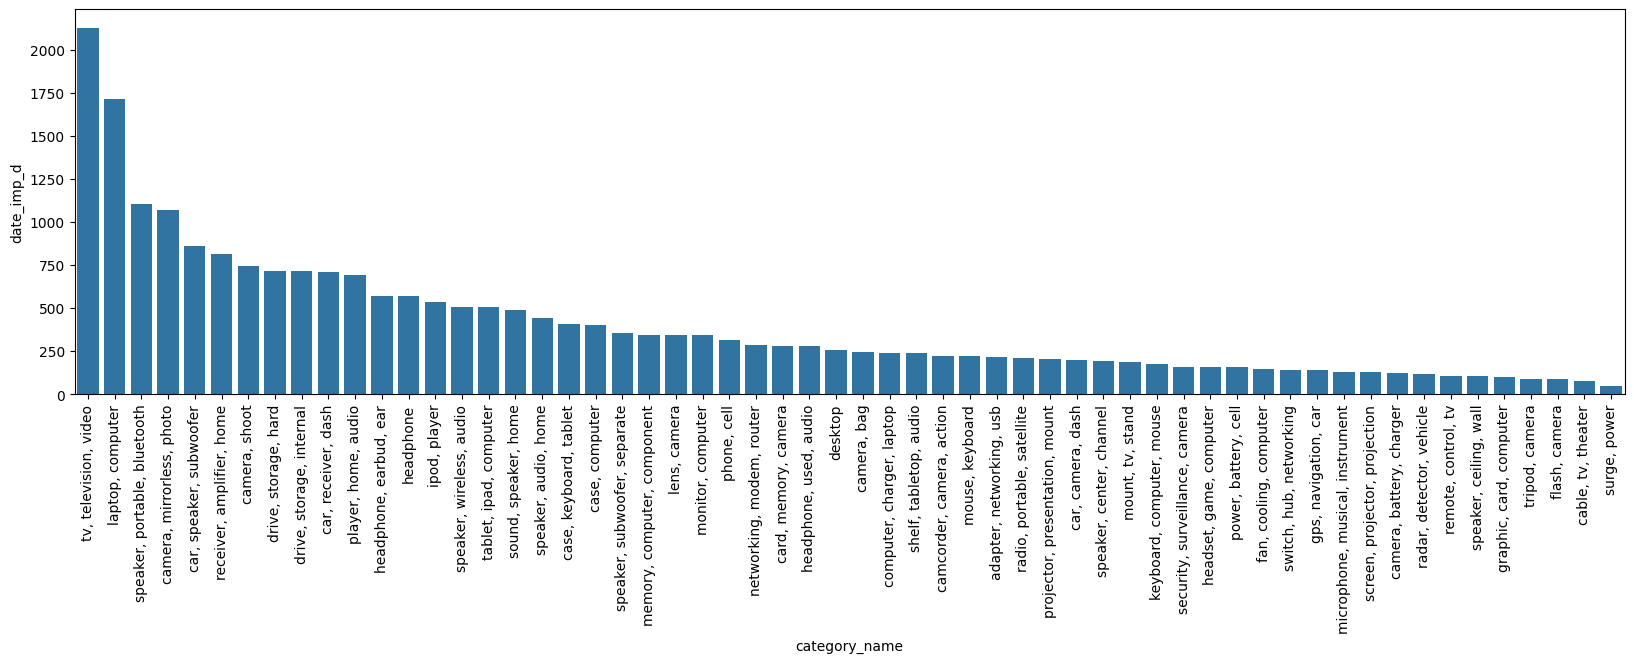

In [20]:
aux1 = df2[['date_imp_d', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp_d', ascending=False)

plt.figure(figsize=(20, 5))
plt.xticks(rotation=90)
sns.barplot(x='category_name', y='date_imp_d', data=aux1 );

### 2.2.2. Categorias mais vendidas por loja

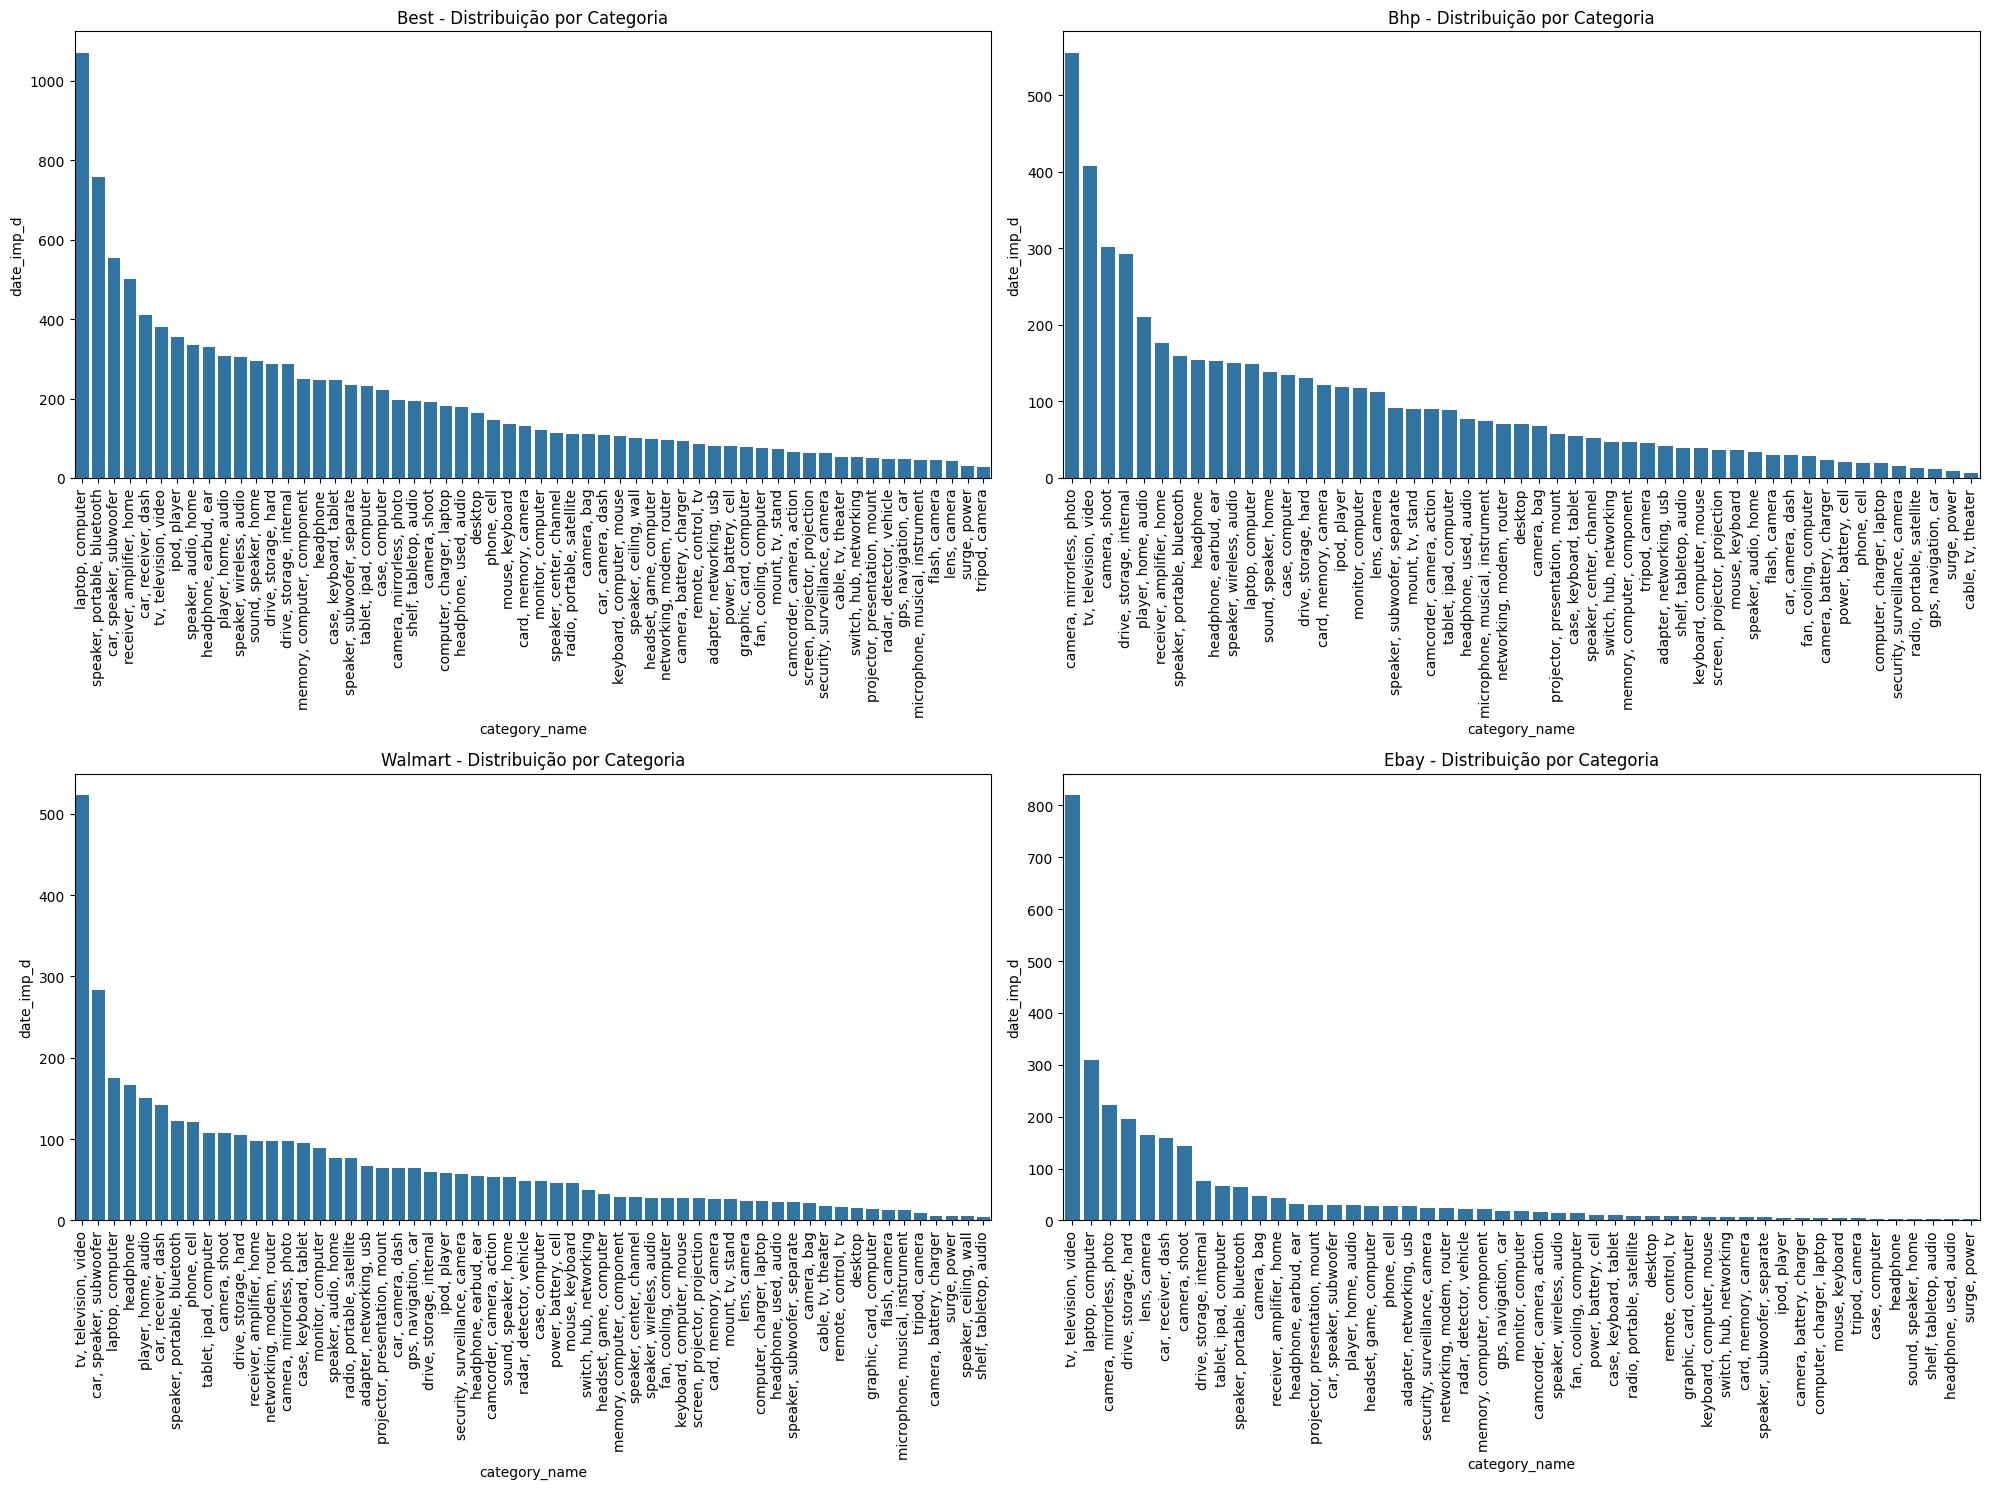

In [21]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
aux1 = df_best[['date_imp_d', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=90)
plt.title('Best - Distribuição por Categoria')
sns.barplot(x='category_name', y='date_imp_d', data=aux1);

plt.subplot(2, 2, 2)
aux2 = df_bhp[['date_imp_d', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=90)
plt.title('Bhp - Distribuição por Categoria')
sns.barplot( x='category_name', y='date_imp_d', data=aux2 );

plt.subplot(2, 2, 3)
aux3 = df_walmart[['date_imp_d', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=90)
plt.title('Walmart - Distribuição por Categoria')
sns.barplot( x='category_name', y='date_imp_d', data=aux3 );

plt.subplot(2, 2, 4)
aux4 = df_ebay[['date_imp_d', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=90)
plt.title('Ebay - Distribuição por Categoria')
sns.barplot( x='category_name', y='date_imp_d', data=aux4 );

plt.tight_layout()


## 2.3. Qual a marca mais vendida?

### 2.3.1. Marca mais vendida no geral

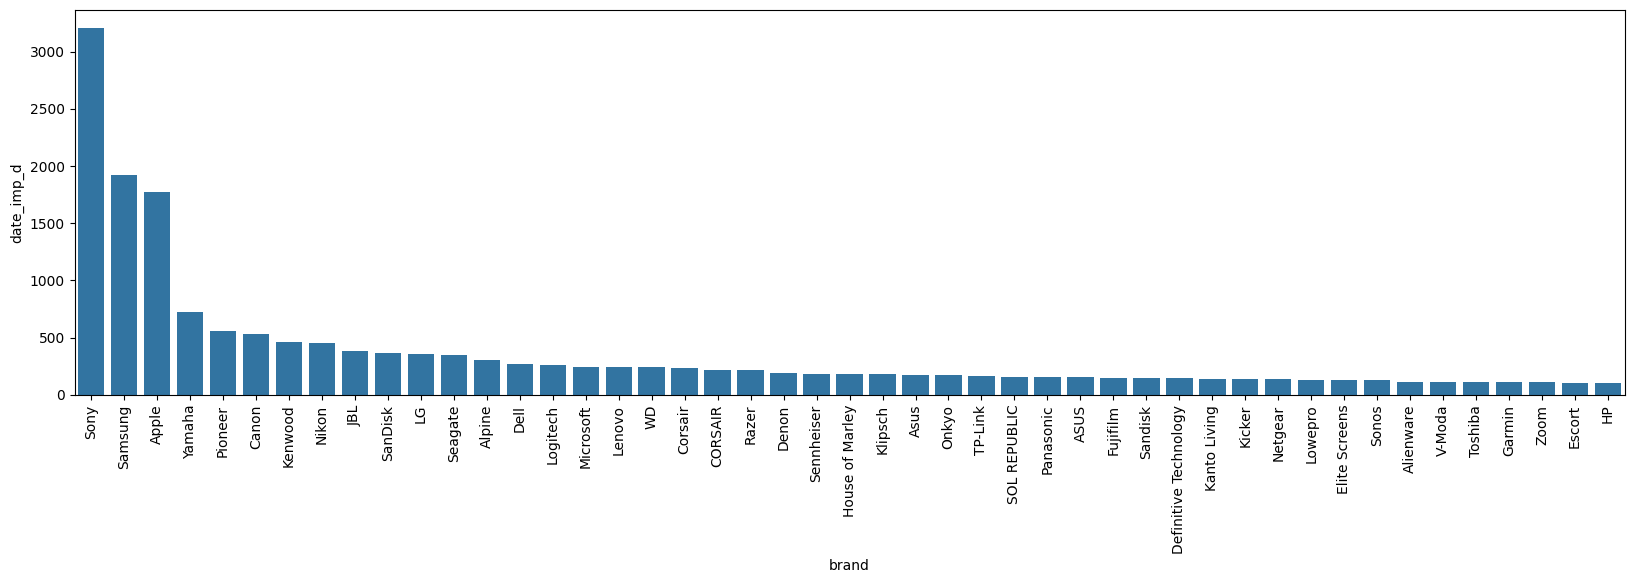

In [22]:
plt.figure(figsize=(20, 5))

aux1 = df2[['date_imp_d', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp_d', ascending=False)
aux1 = aux1[aux1['date_imp_d'] > 100]

plt.xticks(rotation=90)
sns.barplot(x='brand', y='date_imp_d', data=aux1);

### 2.3.2. Marca mais vendida por loja

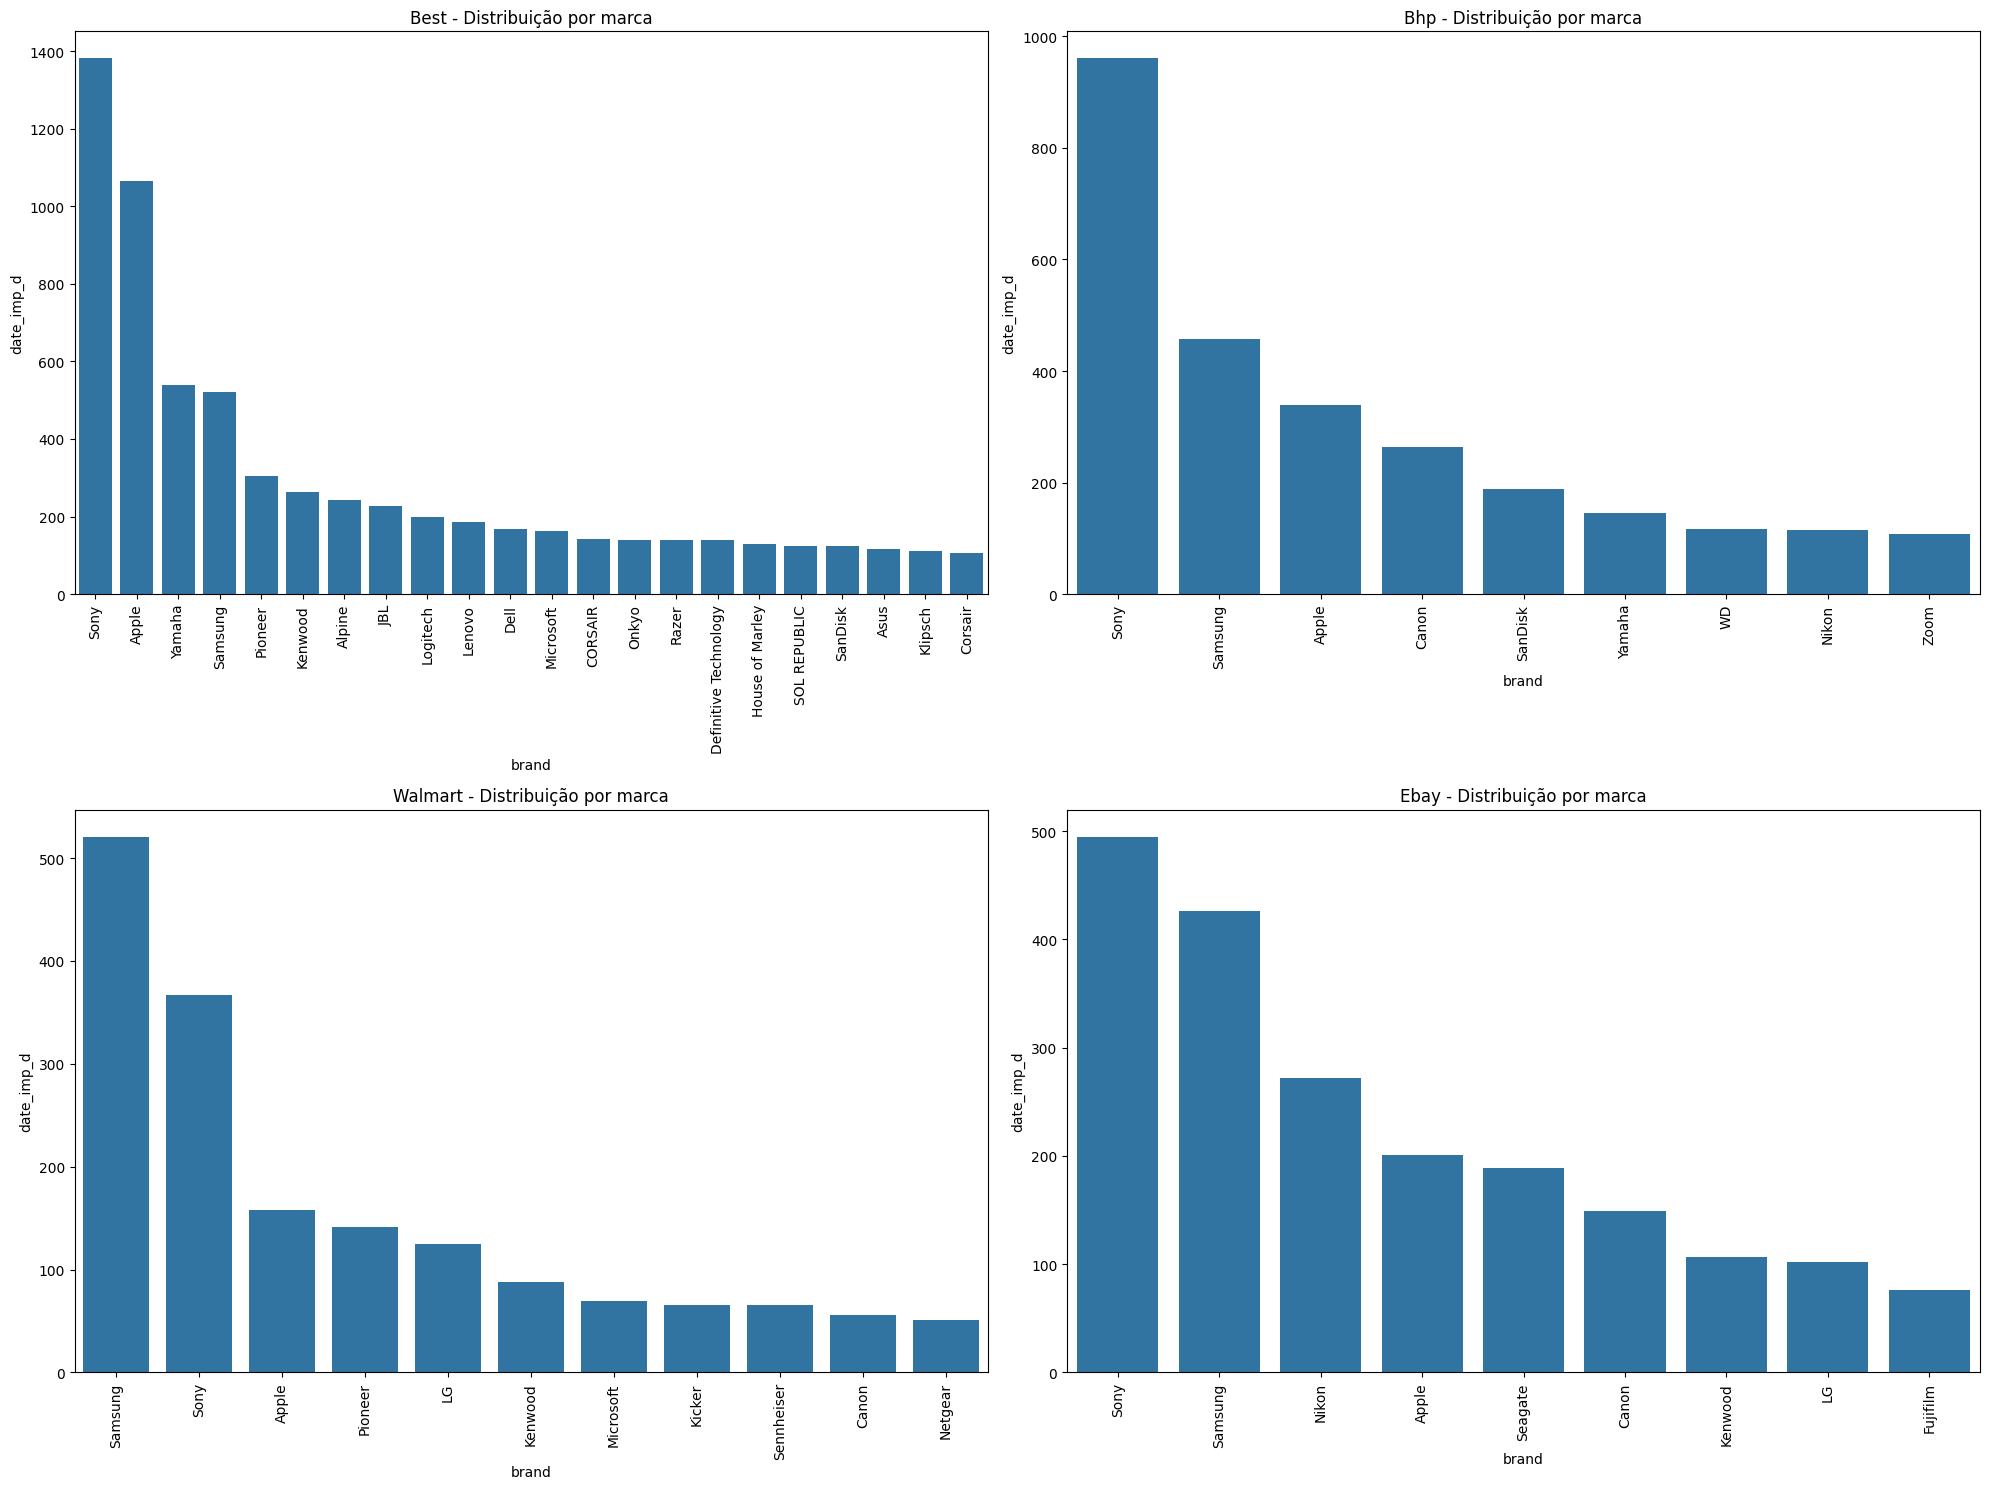

In [23]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
aux1 = df_best[['date_imp_d', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp_d', ascending=False)
aux1 = aux1[aux1['date_imp_d'] > 100]
plt.xticks(rotation=90)
plt.title('Best - Distribuição por marca')
sns.barplot(x='brand', y='date_imp_d', data=aux1);

plt.subplot(2, 2, 2)
aux2 = df_bhp[['date_imp_d', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp_d', ascending=False)
aux2 = aux2[aux2['date_imp_d'] > 100]
plt.xticks(rotation=90)
plt.title('Bhp - Distribuição por marca')
sns.barplot(x='brand', y='date_imp_d', data=aux2);

plt.subplot(2, 2, 3)
aux3 = df_walmart[['date_imp_d', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp_d', ascending=False)
aux3 = aux3[aux3['date_imp_d'] > 50]
plt.xticks(rotation=90)
plt.title('Walmart - Distribuição por marca')
sns.barplot(x='brand', y='date_imp_d', data=aux3);

plt.subplot(2, 2, 4)
aux4 = df_ebay[['date_imp_d', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp_d', ascending=False)
aux4 = aux4[aux4['date_imp_d'] > 50]
plt.xticks(rotation=90)
plt.title('Ebay - Distribuição por marca')
sns.barplot(x='brand', y='date_imp_d', data=aux4);

plt.tight_layout()

##  2.4. Quais os dias que mais vendem?

### 2.4.1 Dias que vendem mais geral

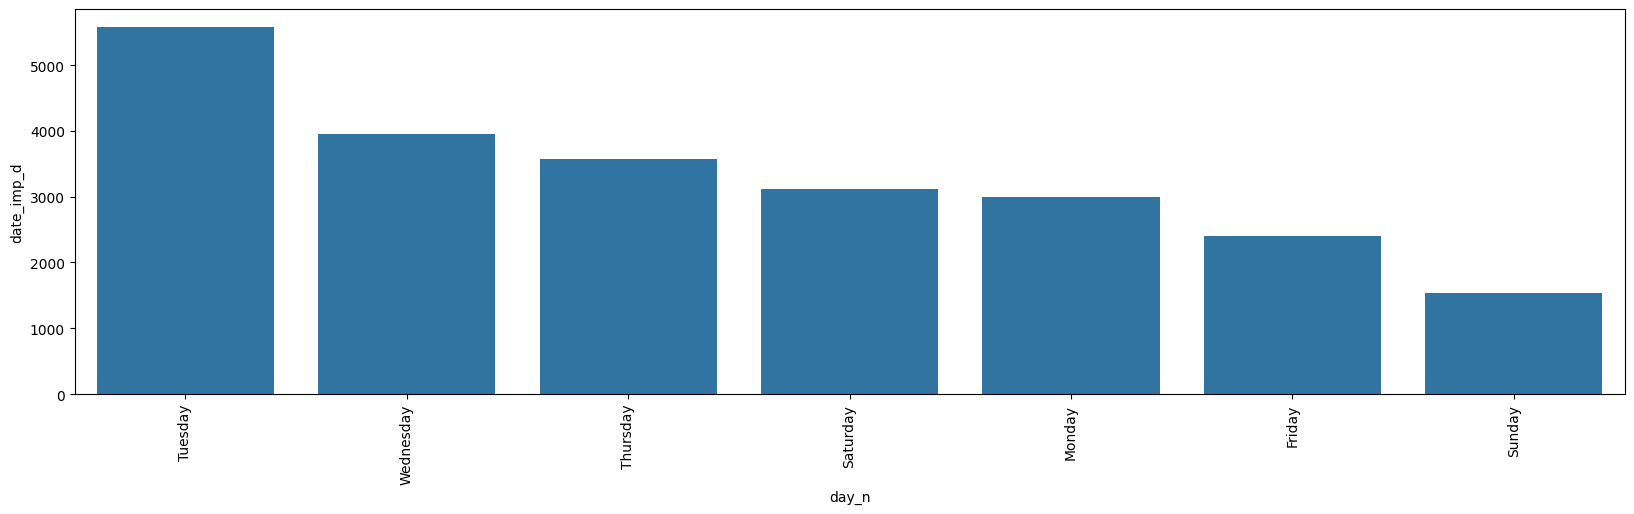

In [24]:
plt.figure(figsize=(20, 5))

aux1 = df2[['date_imp_d', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp_d', ascending=False)

plt.xticks(rotation=90)
sns.barplot(x='day_n', y='date_imp_d', data=aux1);

### 2.4.2 Dias que vendem mais por loja

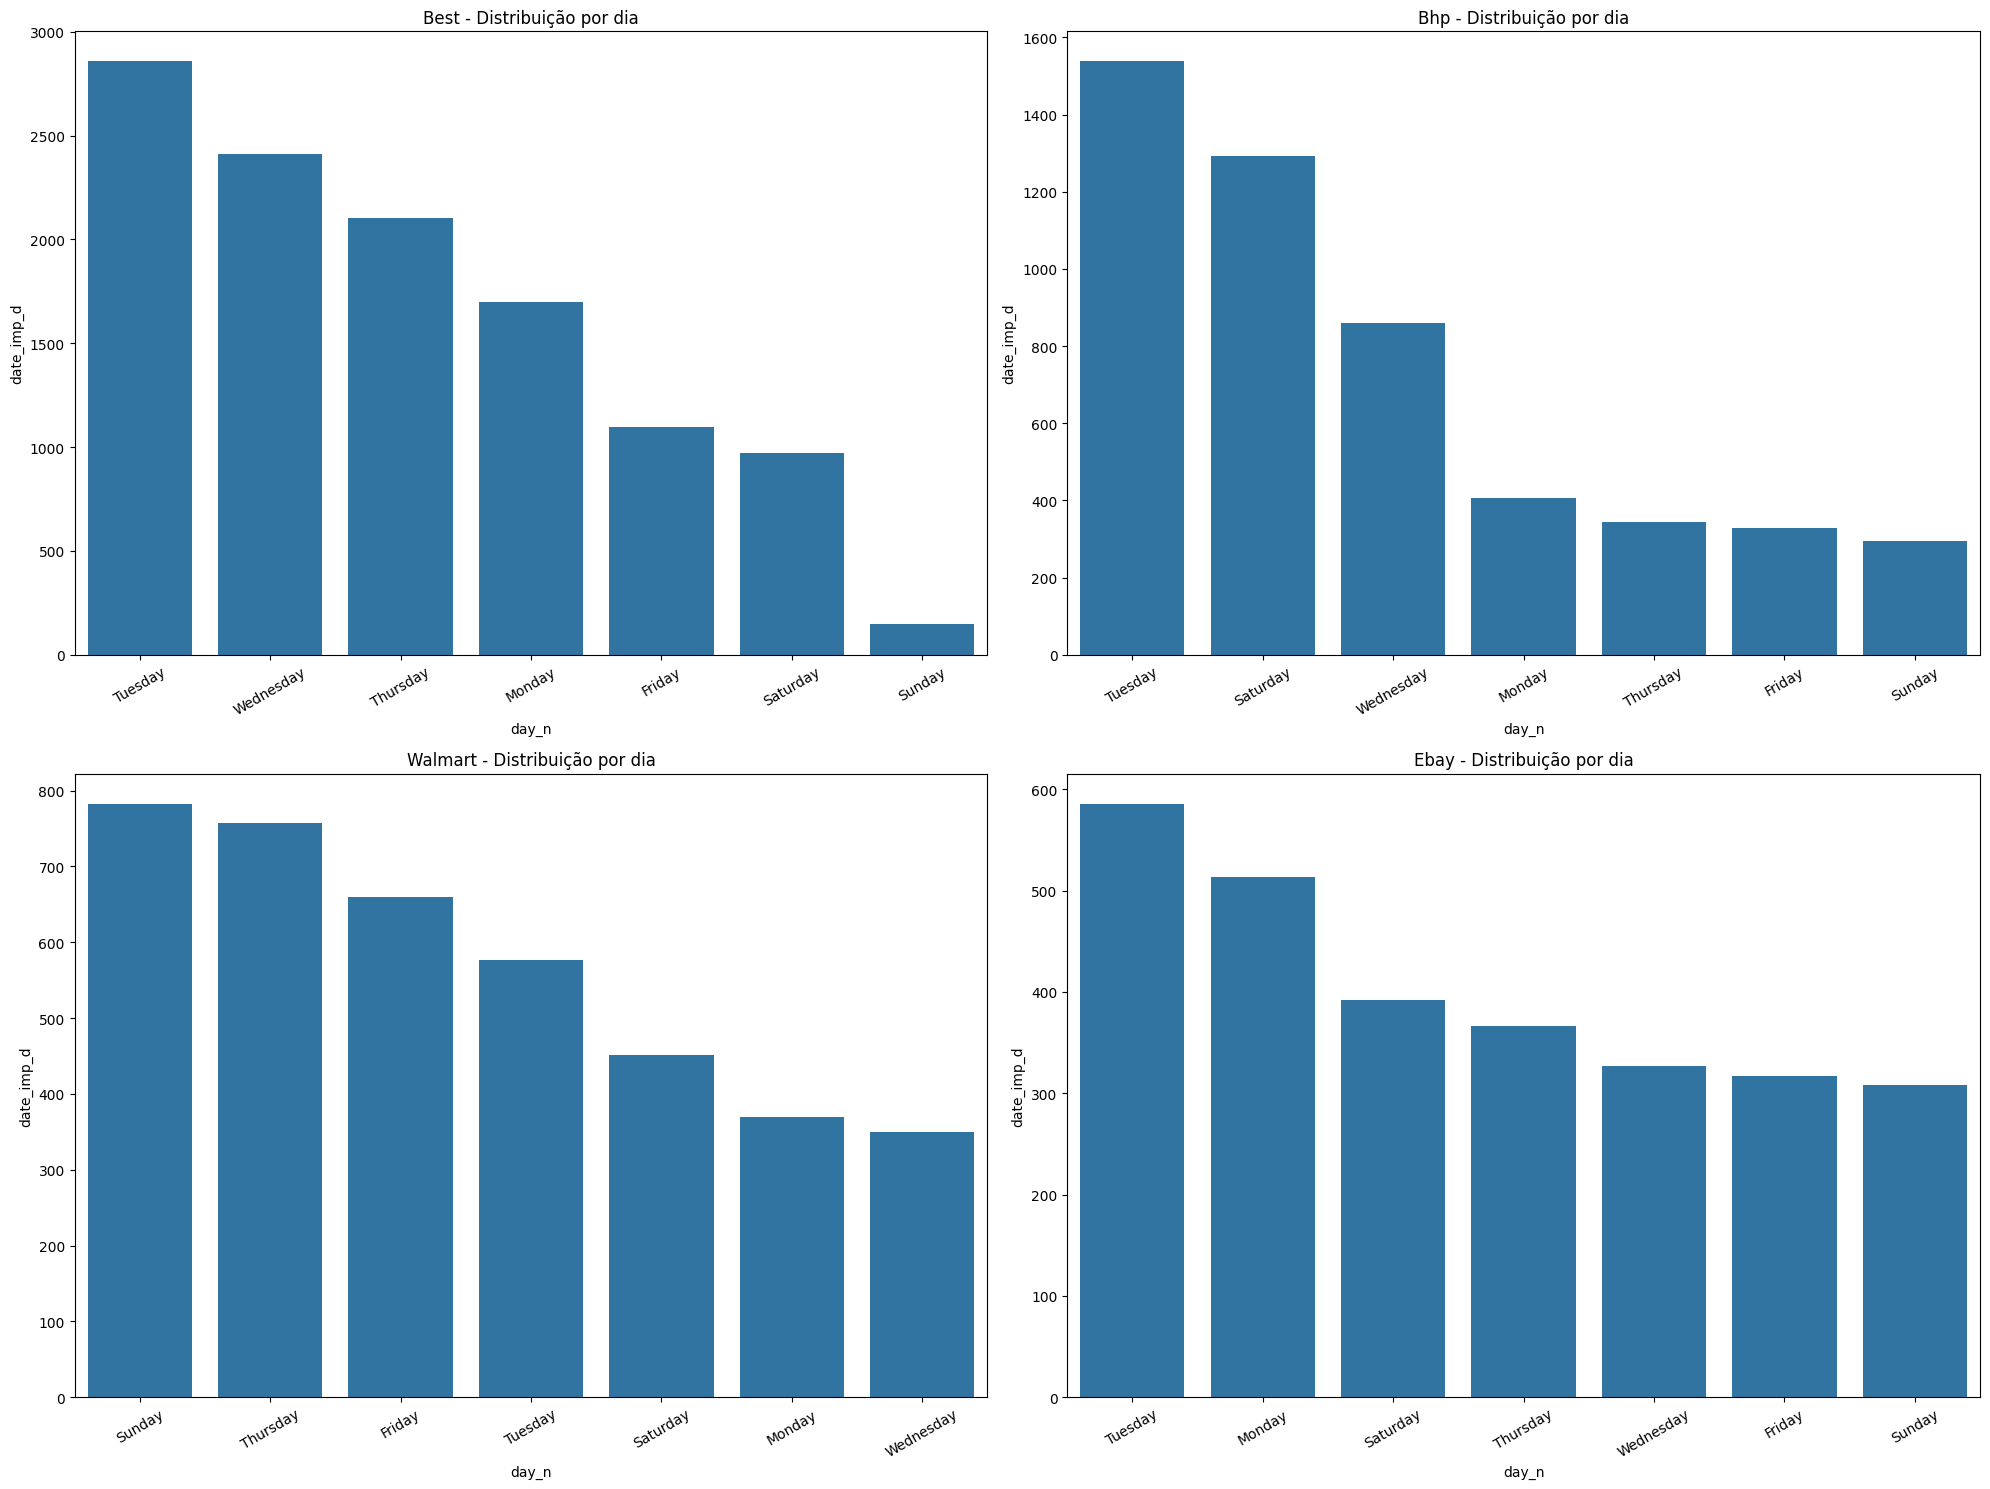

In [25]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
aux1 = df_best[['date_imp_d', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=30)
plt.title('Best - Distribuição por dia')
sns.barplot(x='day_n', y='date_imp_d', data=aux1 );

plt.subplot(2, 2, 2)
aux2 = df_bhp[['date_imp_d', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=30)
plt.title('Bhp - Distribuição por dia')
sns.barplot(x='day_n', y='date_imp_d', data=aux2 );

plt.subplot(2, 2, 3)
aux3 = df_walmart[['date_imp_d', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=30)
plt.title('Walmart - Distribuição por dia')
sns.barplot(x='day_n', y='date_imp_d', data=aux3 );

plt.subplot(2, 2, 4)
aux4 = df_ebay[['date_imp_d', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=30)
plt.title('Ebay - Distribuição por dia')
sns.barplot( x='day_n', y='date_imp_d', data=aux4 );

plt.tight_layout()

## 2.5. Quais os meses que mais vendem?

### 2.5.1. Meses que mais vendem - Geral

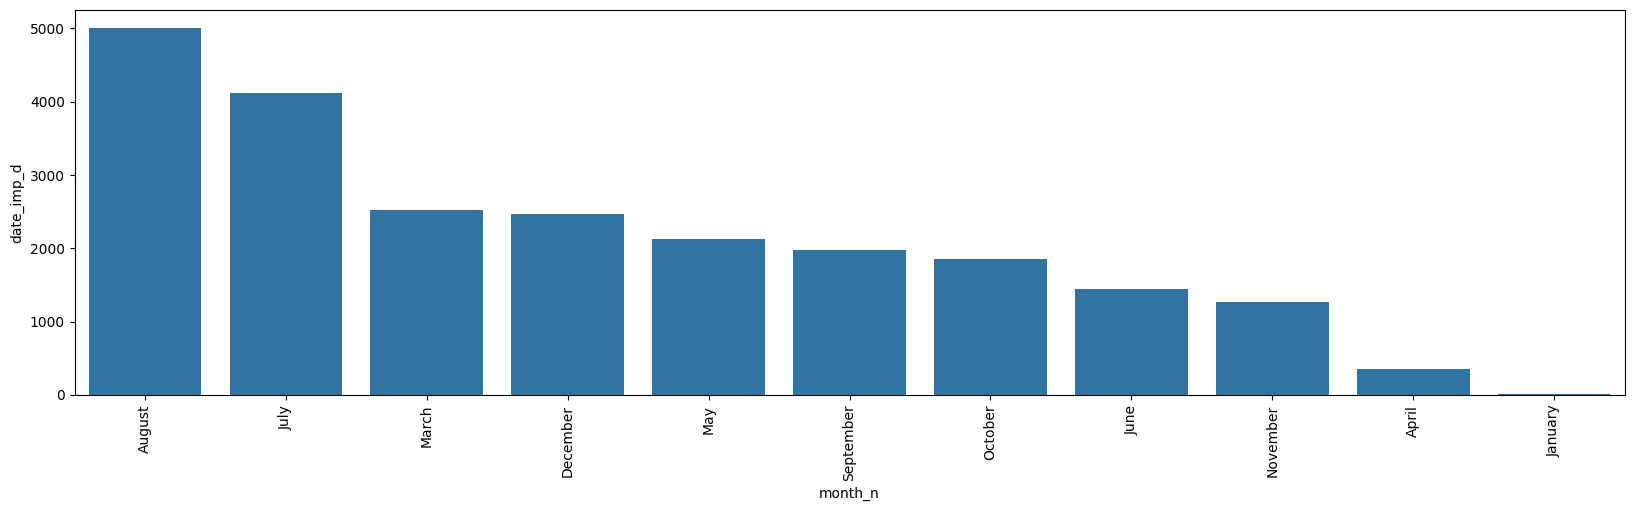

In [26]:
plt.figure(figsize=(20, 5))

aux1 = df2[['date_imp_d', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp_d', ascending=False)

plt.xticks(rotation=90)
sns.barplot( x='month_n', y='date_imp_d', data=aux1 );

### 2.5.2. Meses que mais vendem - Por loja

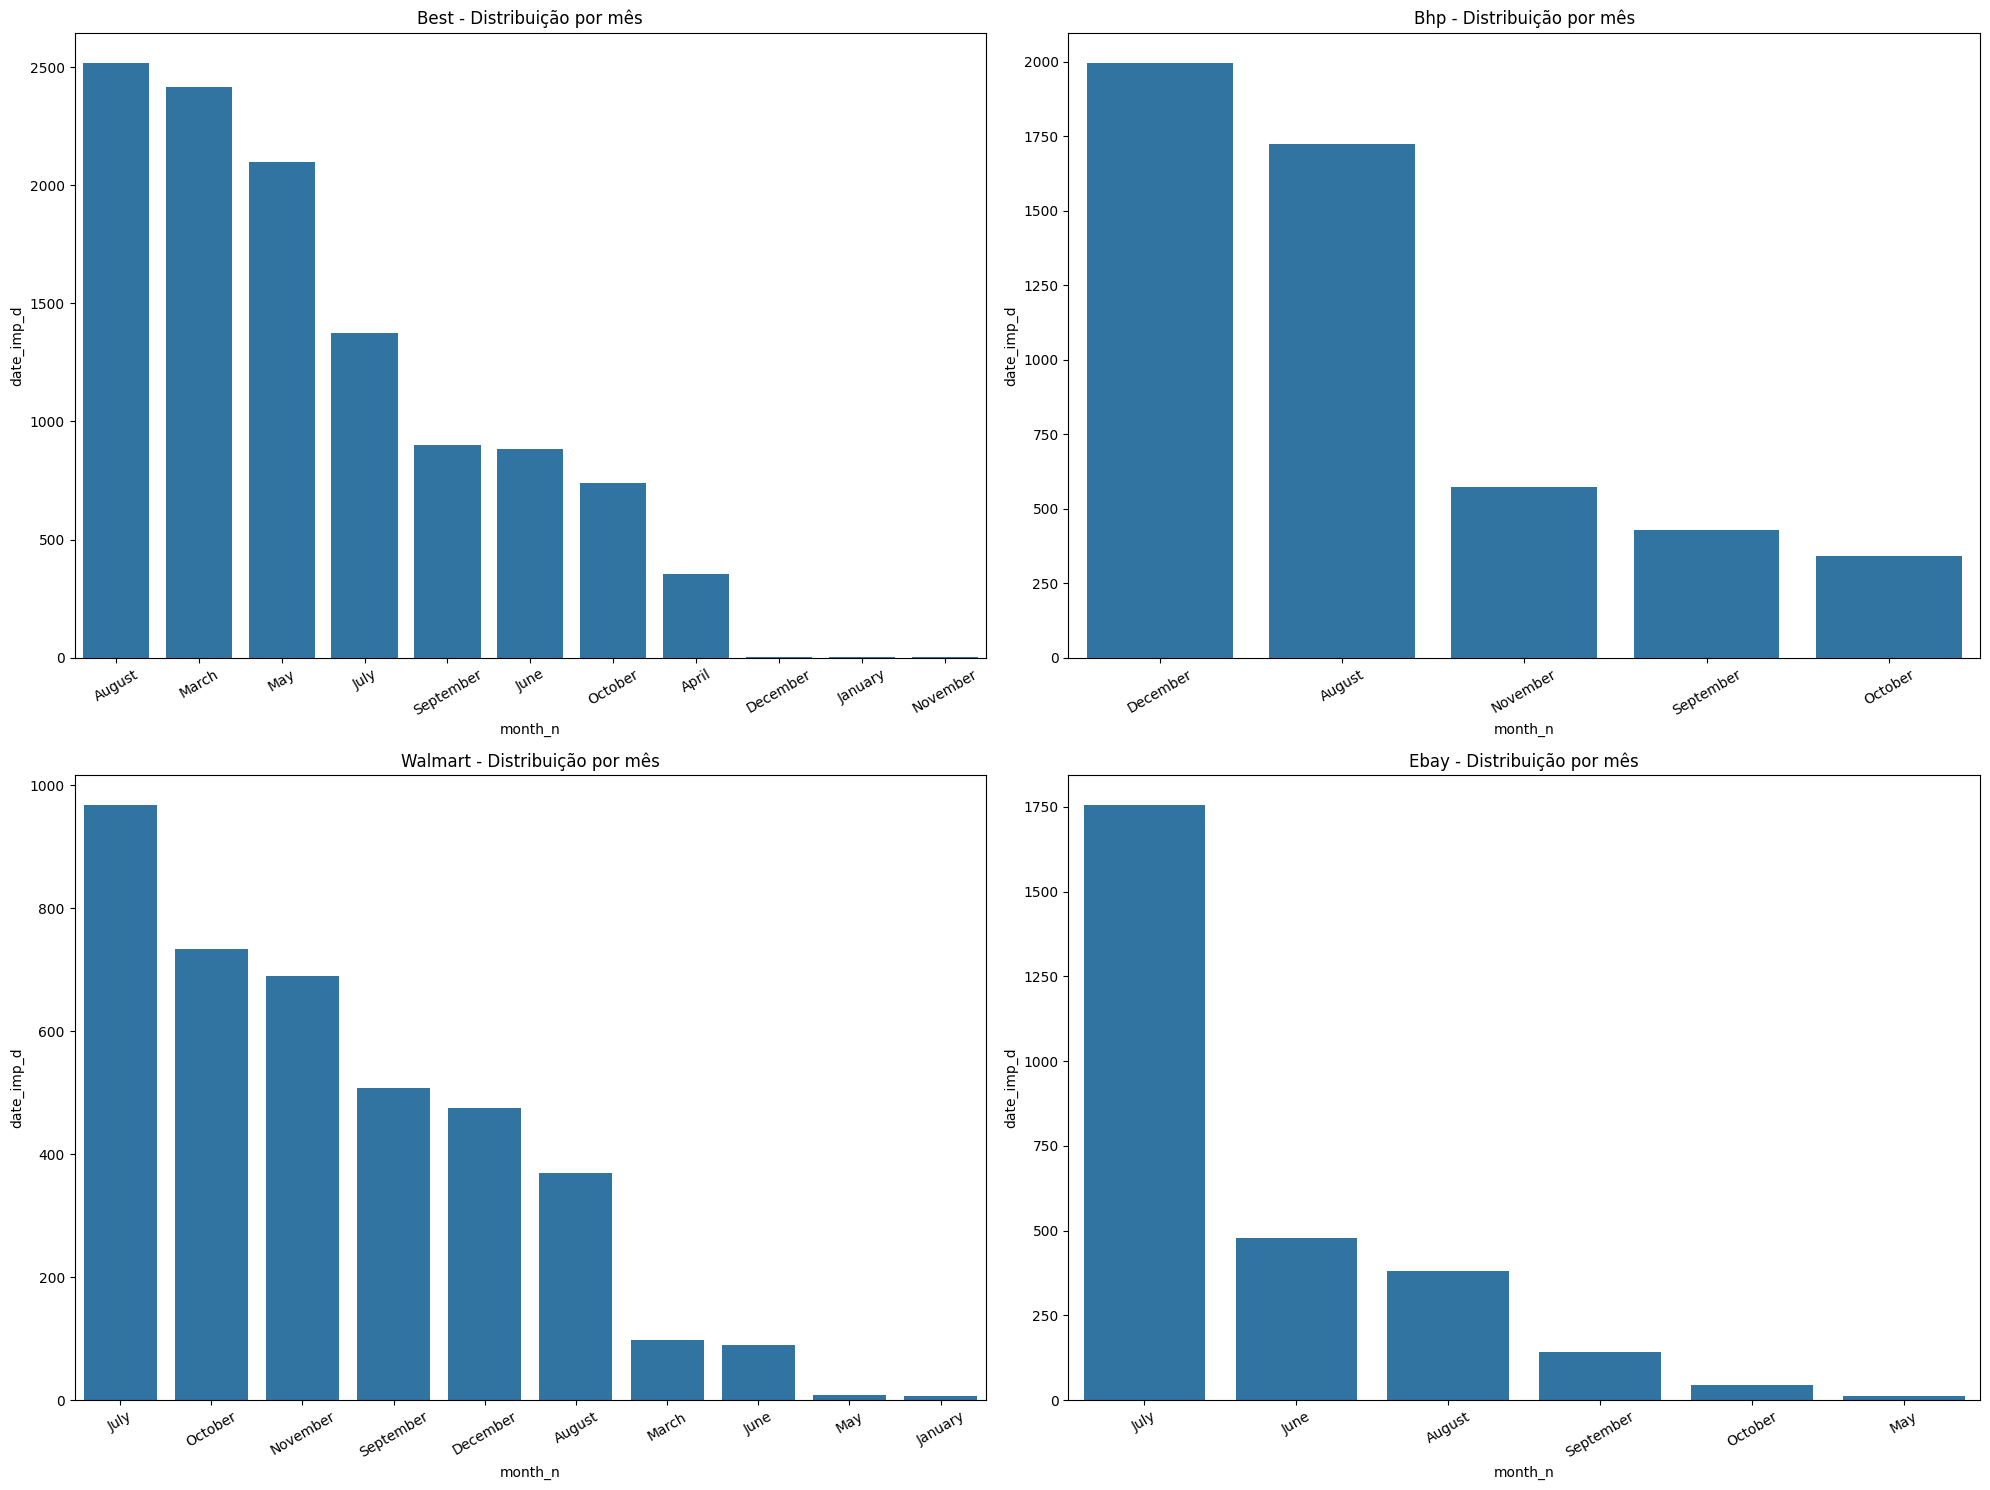

In [27]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
aux1 = df_best[['date_imp_d', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=30)
plt.title('Best - Distribuição por mês')
sns.barplot(x='month_n', y='date_imp_d', data=aux1 );

plt.subplot(2, 2, 2)
aux2 = df_bhp[['date_imp_d', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=30)
plt.title('Bhp - Distribuição por mês')
sns.barplot(x='month_n', y='date_imp_d', data=aux2 );

plt.subplot(2, 2, 3)
aux3 = df_walmart[['date_imp_d', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=30)
plt.title('Walmart - Distribuição por mês')
sns.barplot(x='month_n', y='date_imp_d', data=aux3 );

plt.subplot(2, 2, 4)
aux4 = df_ebay[['date_imp_d', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=30)
plt.title('Ebay - Distribuição por mês')
sns.barplot(x='month_n', y='date_imp_d', data=aux4 );

plt.tight_layout()

## 2.6. Quais as semanas que mais vendem?

### 2.6.1 Semanas que mais vendem - Geral

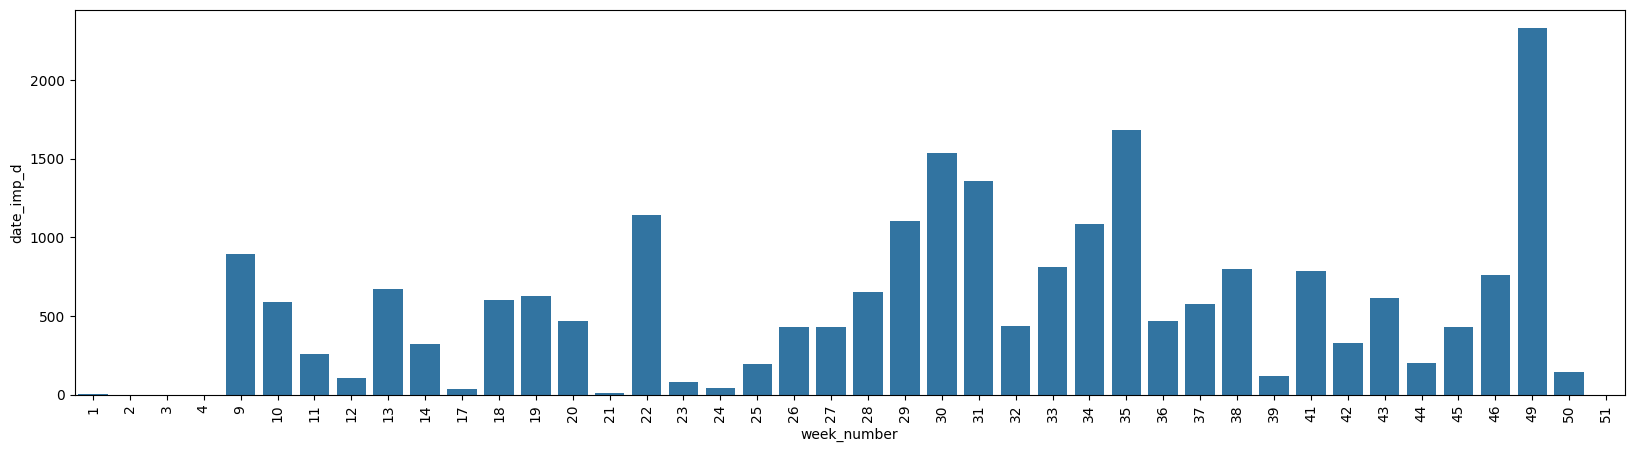

In [28]:
plt.figure(figsize=(20, 5))

aux1 = df2[['date_imp_d', 'week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp_d', ascending=False)

plt.xticks(rotation=90)
sns.barplot(x='week_number', y='date_imp_d', data=aux1);

### 2.6.2 Semanas que mais vendem - Por Loja

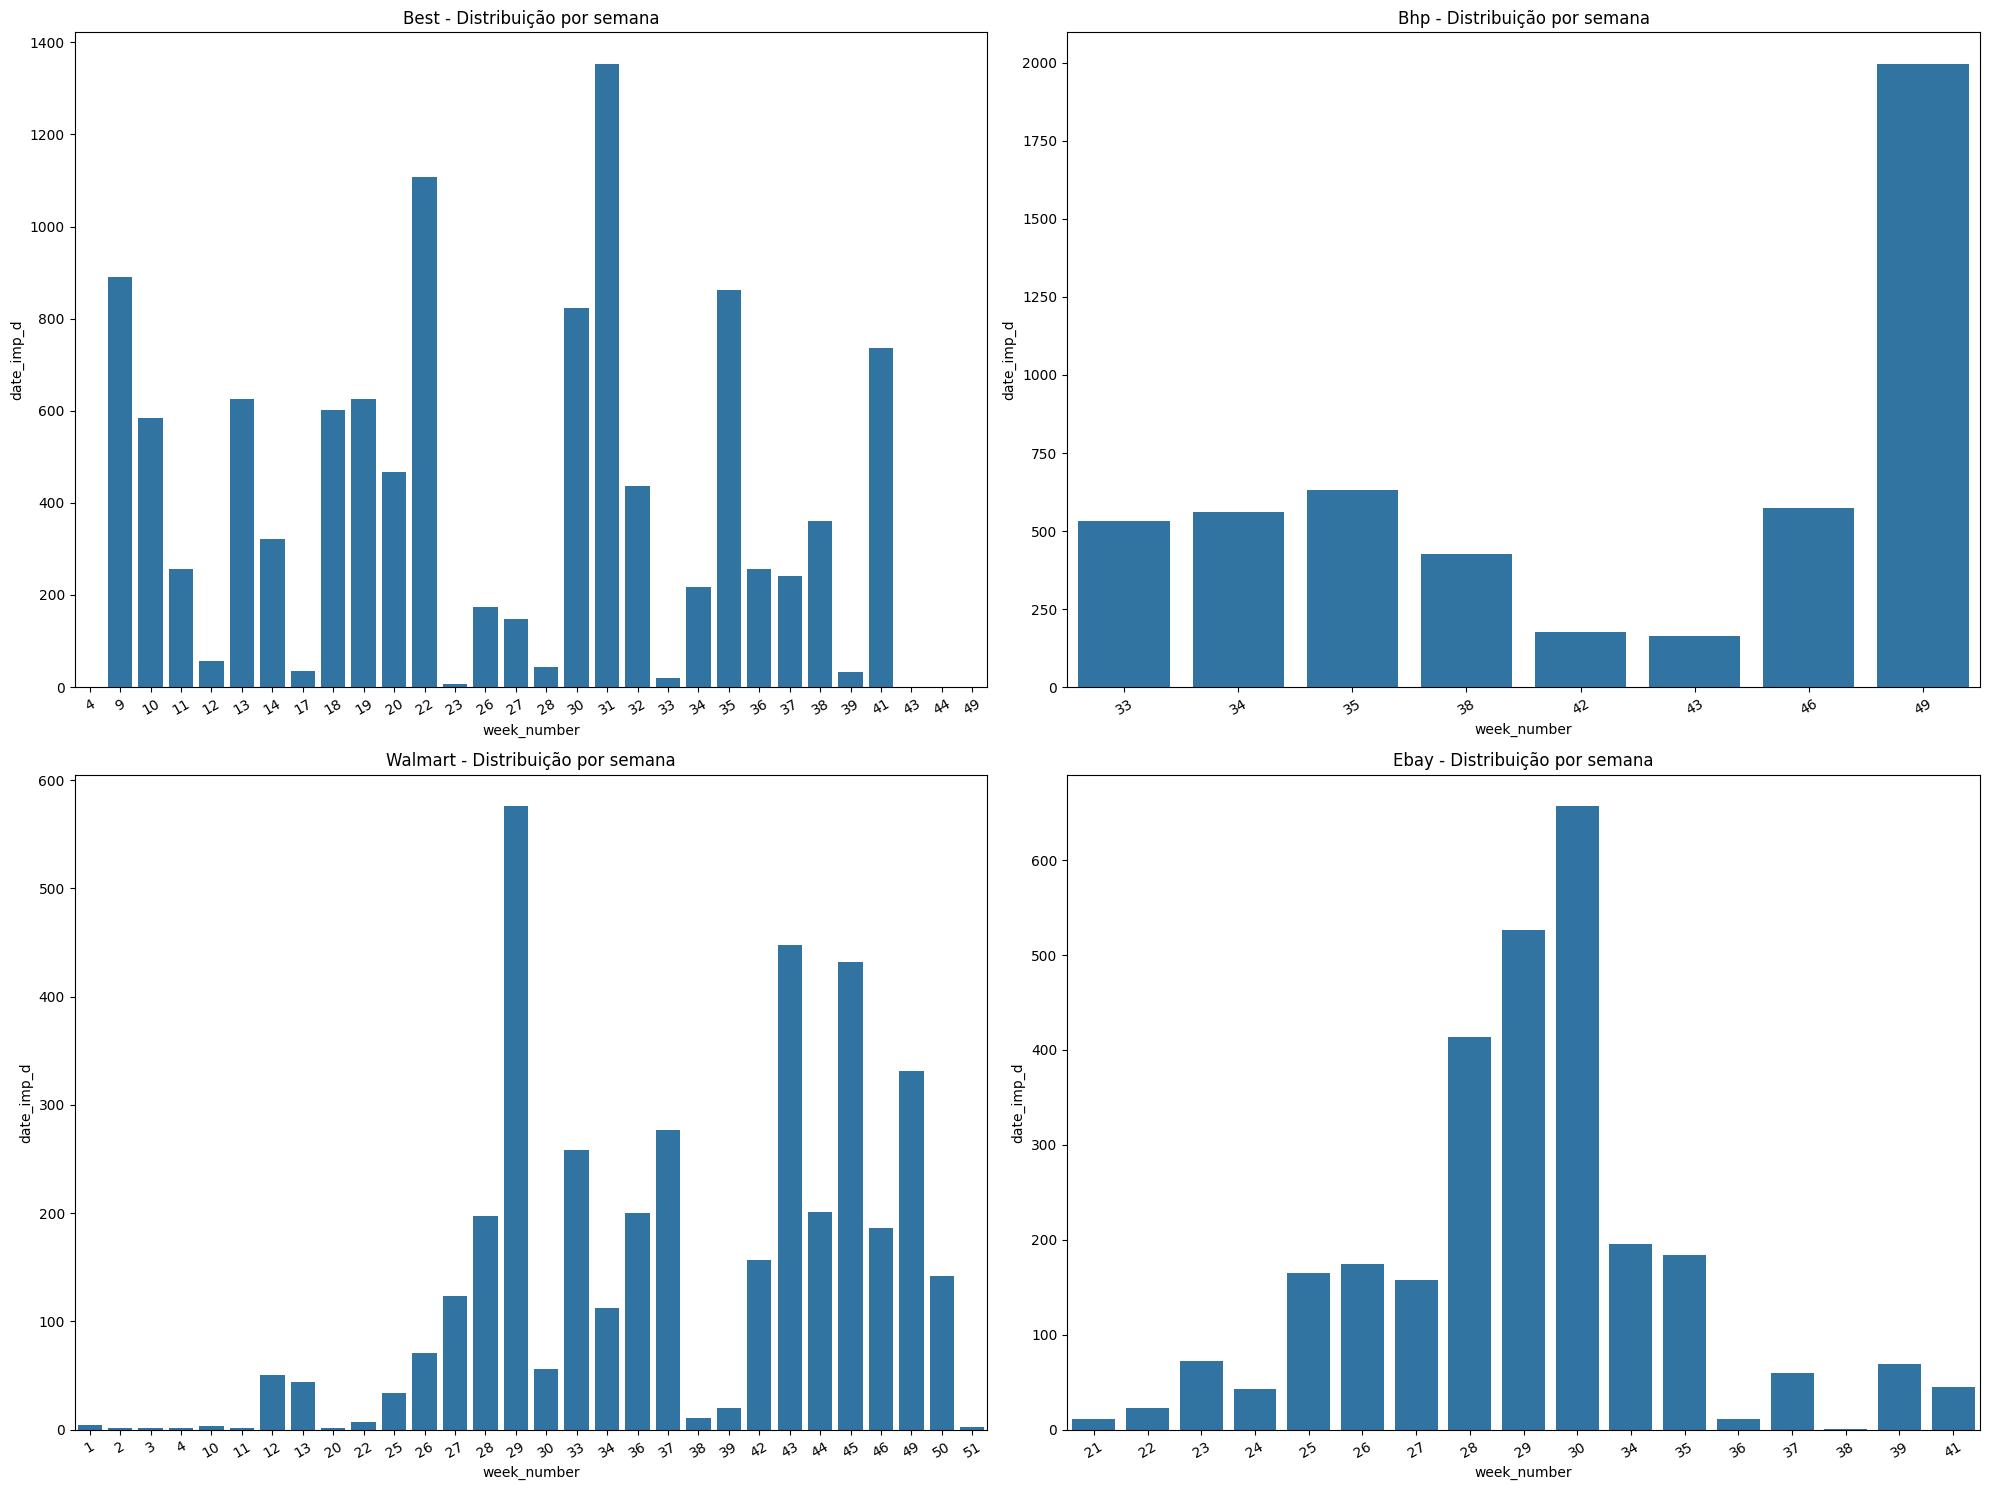

In [29]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
aux1 = df_best[['date_imp_d', 'week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=30)
plt.title('Best - Distribuição por semana')
sns.barplot(x='week_number', y='date_imp_d', data=aux1 );

plt.subplot(2, 2, 2)
aux2 = df_bhp[['date_imp_d', 'week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=30)
plt.title('Bhp - Distribuição por semana')
sns.barplot(x='week_number', y='date_imp_d', data=aux2 );

plt.subplot(2, 2, 3)
aux3 = df_walmart[['date_imp_d', 'week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=30)
plt.title('Walmart - Distribuição por semana')
sns.barplot(x='week_number', y='date_imp_d', data=aux3 );

plt.subplot(2, 2, 4)
aux4 = df_ebay[['date_imp_d', 'week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=30)
plt.title('Ebay - Distribuição por semana')
sns.barplot(x='week_number', y='date_imp_d', data=aux4 );

plt.tight_layout()

# 3.0 Feature Engineering

In [30]:
df3 = df2.copy()

## 3.1.Categoria mais vendida da Bestbuy.com

In [31]:
df_laptop = df_best[df_best['category_name'] == 'laptop, computer']

In [32]:
# check NA
df_laptop.isna().sum()

date_imp_d           0
category_name        0
name                 0
price                0
disc_price           0
merchant             0
disc_percentage      0
is_sale              0
imp_count            0
brand                0
p_description        0
date_added           0
date_seen            0
date_updated         0
manufacturer       627
day_n                0
month                0
month_n              0
day                  0
week_number          0
dtype: int64

In [33]:
test = df_laptop.groupby(['name', 'week_number']).agg({ 'disc_price': 'mean',
                                                       'date_imp_d': 'count'}).reset_index()

test.head()

name  week_number  disc_price  date_imp_d
0  12 MacBook (Mid 2017, Gold)           30     1599.99           1
1  12 MacBook (Mid 2017, Gold)           31     1551.99           8
2  12 MacBook (Mid 2017, Gold)           33     1454.99           2
3  12 MacBook (Mid 2017, Gold)           34     1551.99           2
4  12 MacBook (Mid 2017, Gold)           35     1474.49           4

In [34]:
# dataframe dos valores de x
x_price = test.pivot( index='week_number' , columns='name', values='disc_price')
x_price = pd.DataFrame(x_price.to_records() )

# dataframe dos valores de y
y_demand = test.pivot( index='week_number' , columns='name', values='date_imp_d')
y_demand = pd.DataFrame( y_demand.to_records() )

# Descrição dos novos Dataframes

# 4.0. Descrição dos Dados

## 4.1. Data Dimension

In [35]:

print(f'Numero de Linhas do x_price: {x_price.shape[0]}')
print(f'Numero de Colunas do x_price: {x_price.shape[1]}')


Numero de Linhas do x_price: 26
Numero de Colunas do x_price: 40


In [36]:

print(f'Numero de Linhas do y_demand: {y_demand.shape[0]}')
print(f'Numero de Colunas do y_demand: {y_demand.shape[1]}')


Numero de Linhas do y_demand: 26
Numero de Colunas do y_demand: 40


## 4.2. Data Types

In [37]:
x_price.dtypes

week_number                                                                                                                                                                                              int64
12 MacBook (Mid 2017, Gold)                                                                                                                                                                            float64
12 MacBook (Mid 2017, Silver)                                                                                                                                                                          float64
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus                                                                                                                                                           float64
13.3 MacBook Air (Mid 2017, Silver)                                                                                                                                         

In [38]:
y_demand.dtypes

week_number                                                                                                                                                                                              int64
12 MacBook (Mid 2017, Gold)                                                                                                                                                                            float64
12 MacBook (Mid 2017, Silver)                                                                                                                                                                          float64
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus                                                                                                                                                           float64
13.3 MacBook Air (Mid 2017, Silver)                                                                                                                                         

## 4.3. Check NA

In [39]:
x_price.isna().sum()

week_number                                                                                                                                                                                             0
12 MacBook (Mid 2017, Gold)                                                                                                                                                                            17
12 MacBook (Mid 2017, Silver)                                                                                                                                                                          18
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus                                                                                                                                                           13
13.3 MacBook Air (Mid 2017, Silver)                                                                                                                                                             

In [40]:
y_demand.isna().sum()

week_number                                                                                                                                                                                             0
12 MacBook (Mid 2017, Gold)                                                                                                                                                                            17
12 MacBook (Mid 2017, Silver)                                                                                                                                                                          18
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus                                                                                                                                                           13
13.3 MacBook Air (Mid 2017, Silver)                                                                                                                                                             

## 4.4. Replace NA

In [41]:
# subistitui NA pela mediana do preço
a = np.round(x_price.median(), 2 )
x_price.fillna(a, inplace=True )
x_price.head()

week_number  12 MacBook (Mid 2017, Gold)  12 MacBook (Mid 2017, Silver)  \
0            4                      1551.99                        1299.99   
1            9                      1551.99                        1299.99   
2           10                      1551.99                        1299.99   
3           11                      1551.99                        1299.99   
4           13                      1551.99                        1299.99   

   12.3 32GB Multi-Touch 2-in-1 Chromebook Plus  \
0                                       415.500   
1                                       426.495   
2                                       426.495   
3                                       415.500   
4                                       449.000   

   13.3 MacBook Air (Mid 2017, Silver)  \
0                               949.99   
1                               949.99   
2                               949.99   
3                               949.99   
4                               949.99   

   15.4 MacBook Pro with Touch Bar (Late 2016, Silver)  \
0                                            2618.99     
1                                            2799.99     
2                                            2799.99     
3                                            2715.99     
4                                            2547.99     

   15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)  \
0                                            2353.99         
1                                            2599.99         
2                                            2599.99         
3                                            2482.99         
4                                            2353.99         

   ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X  \
0                                             304.99                                                     
1                                             304.99                                                     
2                                             304.99                                                     
3                                             304.99                                                     
4                                             304.99                                                     

   Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray"  \
0                                             829.99                                                                                        
1                                             899.99                                                                                        
2                                             899.99                                                                                        
3                                             829.99                                                                                        
4                                             849.99                                                                                        

   Acer 15.6 Chromebook CB5-571-C4G4  ...  \
0                            249.000  ...   
1                            236.495  ...   
2                            238.995  ...   
3                            249.000  ...   
4                            223.995  ...   

   HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black"  \
0                                             819.99                                 
1                                             799.99                                 
2                                             819.99                                 
3                                             819.99                                 
4                                             819.99               

In [42]:
y_demand.fillna(0, inplace=True)
y_demand.head()

week_number  12 MacBook (Mid 2017, Gold)  12 MacBook (Mid 2017, Silver)  \
0            4                          0.0                            0.0   
1            9                          0.0                            0.0   
2           10                          0.0                            0.0   
3           11                          0.0                            0.0   
4           13                          0.0                            0.0   

   12.3 32GB Multi-Touch 2-in-1 Chromebook Plus  \
0                                           0.0   
1                                           4.0   
2                                           2.0   
3                                           0.0   
4                                           1.0   

   13.3 MacBook Air (Mid 2017, Silver)  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  0.0   
4                                  0.0   

   15.4 MacBook Pro with Touch Bar (Late 2016, Silver)  \
0                                                0.0     
1                                                3.0     
2                                                1.0     
3                                                2.0     
4                                                2.0     

   15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)  \
0                                                0.0         
1                                                6.0         
2                                                4.0         
3                                                4.0         
4                                                8.0         

   ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X  \
0                                                0.0                                                     
1                                                0.0                                                     
2                                                0.0                                                     
3                                                0.0                                                     
4                                                0.0                                                     

   Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray"  \
0                                                0.0                                                                                        
1                                                2.0                                                                                        
2                                                1.0                                                                                        
3                                                0.0                                                                                        
4                                                1.0                                                                                        

   Acer 15.6 Chromebook CB5-571-C4G4  ...  \
0                                0.0  ...   
1                                4.0  ...   
2                                2.0  ...   
3                                0.0  ...   
4                                2.0  ...   

   HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black"  \
0                                                0.0                                 
1                                                1.0                                 
2                                                1.0                                 
3                                                1.0                                 
4                                                1.0               

## 4.5. Descriptive Statistics

In [43]:
# Tendencia Central - media, mediana
ct1_x = pd.DataFrame( x_price.apply( np.mean) ).T  # media
ct2_x = pd.DataFrame( x_price.apply( np.median) ).T # mediana


# Disperção - desvio padrão, min, max, intervalo, skew, kurtosis
d1_x = pd.DataFrame( x_price.apply( np.std) ).T                              # desvio padrão
d2_x = pd.DataFrame( x_price.apply( min ) ).T                           # minimo
d3_x = pd.DataFrame( x_price.apply( max ) ).T                           # maximo
d4_x = pd.DataFrame( x_price.apply( lambda x: x.max() - x.min() ) ).T     # intervalo
d5_x = pd.DataFrame( x_price.apply( lambda x: x.skew() ) ).T              # skew
d6_x = pd.DataFrame( x_price.apply( lambda x: x.kurtosis() ) ).T          # kurtosis

# Concatenar os resultados
m1_x = pd.concat( [d2_x, d3_x, d4_x, ct1_x, ct2_x, d1_x, d5_x, d6_x]).T.reset_index()
m1_x.columns = ['Atributos', 'min', 'max', 'intervalo', 'media', 'mediana', 'std', 'skew', 'kurtosis']
m1_x

Atributos       min      max  \
0                                         week_number     4.000    49.00   
1                         12 MacBook (Mid 2017, Gold)  1454.990  1599.99   
2                       12 MacBook (Mid 2017, Silver)  1234.990  1299.99   
3        12.3 32GB Multi-Touch 2-in-1 Chromebook Plus   372.995   449.00   
4                 13.3 MacBook Air (Mid 2017, Silver)   911.990   969.99   
5   15.4 MacBook Pro with Touch Bar (Late 2016, Si...  2327.990  2799.99   
6   15.4 MacBook Pro with Touch Bar (Late 2016, Sp...  2023.990  2599.99   
7   ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...   237.490   313.49   
8   Acer - 2-in-1 15.6 Refurbished Touch-Screen La...   764.990   899.99   
9                   Acer 15.6 Chromebook CB5-571-C4G4   199.990   249.00   
10  Alienware - R3 17.3 Laptop - Intel Core i7 - 1...  1599.990  1899.99   
11  Apple - MacBook Pro® - 13 Display - Intel Core...  1315.990  1454.99   
12  Apple - MacBook Pro® - 13 Display - Intel Core...  1315.990  1454.99   
13  Apple - MacBook Pro® - 13 Display - Intel Core...  1794.490  1999.99   
14                  Apple 13.3 MacBook Air ( Silver)"   600.495  1234.99   
15  Apple MacBook - 12 - Core m5 - 8 GB RAM - 512 ...  1079.990  1519.99   
16  Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In...   700.495  1432.49   
17  Apple MacBook Pro with Touch Bar - 13.3 - Core...  1610.740  1999.99   
18  Asus - 2-in-1 15.6 4K Ultra HD Touch-Screen La...  1091.990  1329.99   
19  Dell - Inspiron 15.6 Laptop - Intel Core i5 - ...   719.990   799.99   
20  Dell - XPS 2-in-1 13.3 Touch-Screen Laptop - I...   700.495  1399.99   
21  Dell XPS 15 15.6 4K Touchcreen Laptop Intel i7...   900.495  2199.99   
22  Details About Alienware 13 R3 Aw13r3/13.3 Fhd/...  1349.990  1799.99   
23  Details About Alienware 15 R3 Aw15r3/15.6 Fhd/...  1601.990  1899.99   
24  Details About Apple Macbook Air 13.3 Laptop (e...   727.490   799.99   
25  Details About Asus Q304 13.3 Laptop I5 2.5 Ghz...   441.990   657.99   
26  Details About Dell Inspiron I75675650blkpus 15...   763.990   868.49   
27  Details About Openbox Excellent: Asus Rog Gl50...  1063.490  1249.99   
28  Details About Razer Blade Laptop 14 Full Hd (i...  1050.495  2099.99   
29   Ginsu BESTBUY5580020 Lenovo Ideapad 11.6 Laptop"   123.490   189.99   
30  HP - ProBook 14 Laptop - Intel Core i5 - 4GB M...   799.990   819.99   
31  HP 15-AY103DX 15.6 Touchscreen Touch Screen HD...   427.490   499.99   
32  Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ...   170.990   229.99   
33  Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Lap...   513.990   664.99   
34  Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD To...   314.990   474.99   
35  Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD T...   316.990   383.99   
36  MSI - WS Series 15.6 Laptop - Intel Core i7 - ...  2299.990  2399.99   
37  New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5g...   554.990   949.99   
38  Razer - Blade Pro 17.3 4K Ultra HD Touch-Scree...  3674.990  4399.99   
39  Samsung - Notebook 5 15.6 Touch-Screen Laptop ...   569.990   617.49   

    intervalo        media  mediana         std      skew   kurtosis  
0      45.000    27.076923    29.00   11.945141 -0.186167  -0.905369  
1     145.000  1547.124615  1551.99   25.648346 -2.457686   8.310054  
2      65.000  1295.990000  1299.99   14.317821 -3.735032  13.784949  
3      76.005   413.189808   415.50   15.423120 -1.054924   2.830858  
4      58.000   949.297692   949.99    8.393080 -2.975611  16.702015  
5     472.000  2607.393846  2618.99  112.833610 -1.131897   2.049122  
6     576.000  2346.913077  2353.99  122.523757 -0.274833   1.347179  
7      76.000   299.720769   304.99   16.347918 -2.916993   8.218479  
8     135.000   834.028462   829.99   27.804926  0.937281   2.943939  
9      49.010   242.479231   249.00   14.017001 -2.306458   4.514429  
10    300.000  1879.643846  1899.99   71.165540 -3.486137  11.301211  
11    139.000  1402.393846  1409.99   32.489945 -1.674626   2.634043  
12  

In [44]:
# Tendencia Central - media, mediana
ct1_y = pd.DataFrame( y_demand.apply( np.mean) ).T  # media
ct2_y = pd.DataFrame( y_demand.apply( np.median) ).T # mediana


# Disperção - desvio padrão, min, max, intervalo, skew, kurtosis
d1_y = pd.DataFrame( y_demand.apply( np.std) ).T                              # desvio padrão
d2_y = pd.DataFrame( y_demand.apply( min ) ).T                           # minimo
d3_y = pd.DataFrame( y_demand.apply( max ) ).T                           # maximo
d4_y = pd.DataFrame( y_demand.apply( lambda x: x.max() - x.min() ) ).T     # intervalo
d5_y = pd.DataFrame( y_demand.apply( lambda x: x.skew() ) ).T              # skew
d6_y = pd.DataFrame( y_demand.apply( lambda x: x.kurtosis() ) ).T          # kurtosis

# Concatenar os resultados
m1_y = pd.concat( [d2_y, d3_y, d4_y, ct1_y, ct2_y, d1_y, d5_y, d6_y]).T.reset_index()
m1_y.columns = ['Atributos', 'min', 'max', 'intervalo', 'media', 'mediana', 'std', 'skew', 'kurtosis']
m1_y

Atributos  min   max  intervalo  \
0                                         week_number  4.0  49.0       45.0   
1                         12 MacBook (Mid 2017, Gold)  0.0   8.0        8.0   
2                       12 MacBook (Mid 2017, Silver)  0.0   2.0        2.0   
3        12.3 32GB Multi-Touch 2-in-1 Chromebook Plus  0.0   4.0        4.0   
4                 13.3 MacBook Air (Mid 2017, Silver)  0.0   2.0        2.0   
5   15.4 MacBook Pro with Touch Bar (Late 2016, Si...  0.0   6.0        6.0   
6   15.4 MacBook Pro with Touch Bar (Late 2016, Sp...  0.0  12.0       12.0   
7   ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...  0.0   2.0        2.0   
8   Acer - 2-in-1 15.6 Refurbished Touch-Screen La...  0.0   2.0        2.0   
9                   Acer 15.6 Chromebook CB5-571-C4G4  0.0   4.0        4.0   
10  Alienware - R3 17.3 Laptop - Intel Core i7 - 1...  0.0   2.0        2.0   
11  Apple - MacBook Pro® - 13 Display - Intel Core...  0.0   6.0        6.0   
12  Apple - MacBook Pro® - 13 Display - Intel Core...  0.0   6.0        6.0   
13  Apple - MacBook Pro® - 13 Display - Intel Core...  0.0   6.0        6.0   
14                  Apple 13.3 MacBook Air ( Silver)"  0.0   6.0        6.0   
15  Apple MacBook - 12 - Core m5 - 8 GB RAM - 512 ...  0.0   9.0        9.0   
16  Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In...  0.0   4.0        4.0   
17  Apple MacBook Pro with Touch Bar - 13.3 - Core...  0.0  12.0       12.0   
18  Asus - 2-in-1 15.6 4K Ultra HD Touch-Screen La...  0.0   4.0        4.0   
19  Dell - Inspiron 15.6 Laptop - Intel Core i5 - ...  0.0   4.0        4.0   
20  Dell - XPS 2-in-1 13.3 Touch-Screen Laptop - I...  0.0   4.0        4.0   
21  Dell XPS 15 15.6 4K Touchcreen Laptop Intel i7...  0.0   2.0        2.0   
22  Details About Alienware 13 R3 Aw13r3/13.3 Fhd/...  0.0   4.0        4.0   
23  Details About Alienware 15 R3 Aw15r3/15.6 Fhd/...  0.0   4.0        4.0   
24  Details About Apple Macbook Air 13.3 Laptop (e...  0.0   2.0        2.0   
25  Details About Asus Q304 13.3 Laptop I5 2.5 Ghz...  0.0   4.0        4.0   
26  Details About Dell Inspiron I75675650blkpus 15...  0.0   4.0        4.0   
27  Details About Openbox Excellent: Asus Rog Gl50...  0.0   2.0        2.0   
28  Details About Razer Blade Laptop 14 Full Hd (i...  0.0   2.0        2.0   
29   Ginsu BESTBUY5580020 Lenovo Ideapad 11.6 Laptop"  0.0   4.0        4.0   
30  HP - ProBook 14 Laptop - Intel Core i5 - 4GB M...  0.0   2.0        2.0   
31  HP 15-AY103DX 15.6 Touchscreen Touch Screen HD...  0.0   4.0        4.0   
32  Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ...  0.0   2.0        2.0   
33  Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Lap...  0.0   4.0        4.0   
34  Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD To...  0.0   4.0        4.0   
35  Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD T...  0.0   4.0        4.0   
36  MSI - WS Series 15.6 Laptop - Intel Core i7 - ...  0.0   2.0        2.0   
37  New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5g...  0.0   4.0        4.0   
38  Razer - Blade Pro 17.3 4K Ultra HD Touch-Scree...  0.0   4.0        4.0   
39  Samsung - Notebook 5 15.6 Touch-Screen Laptop ...  0.0   4.0        4.0   

        media  mediana        std      skew  kurtosis  
0   27.076923     29.0  11.945141 -0.186167 -0.905369  
1    0.961538      0.0   1.764626  2.738840  9.024976  
2    0.384615      0.0   0.624926  1.474017  1.189701  
3    1.038462      0.5   1.125945  0.606680 -0.428079  
4    0.384615      0.0   0.788227  1.658711  0.807453  
5    1.153846      0.0   1.609881  1.437577  1.673167  
6    3.230769      1.0   3.885948  0.951022 -0.225438  
7    0.538462      0.0   0.887120  1.105353 -0.849951  
8    0.384615      0.0   0.624926  1.474017  1.189701  
9    0.769231      1.0   0.932643  1.711207  4.066693  
10   0.615385      1.0   0.624926  0.534925 -0.518213  
11   1.076923      0.0   1.685300  1.510368  1.459409  
12   1.115385      0.0   1.671640  1.485283  1.450766  
13   0.730769      0

# 5.0. EDA

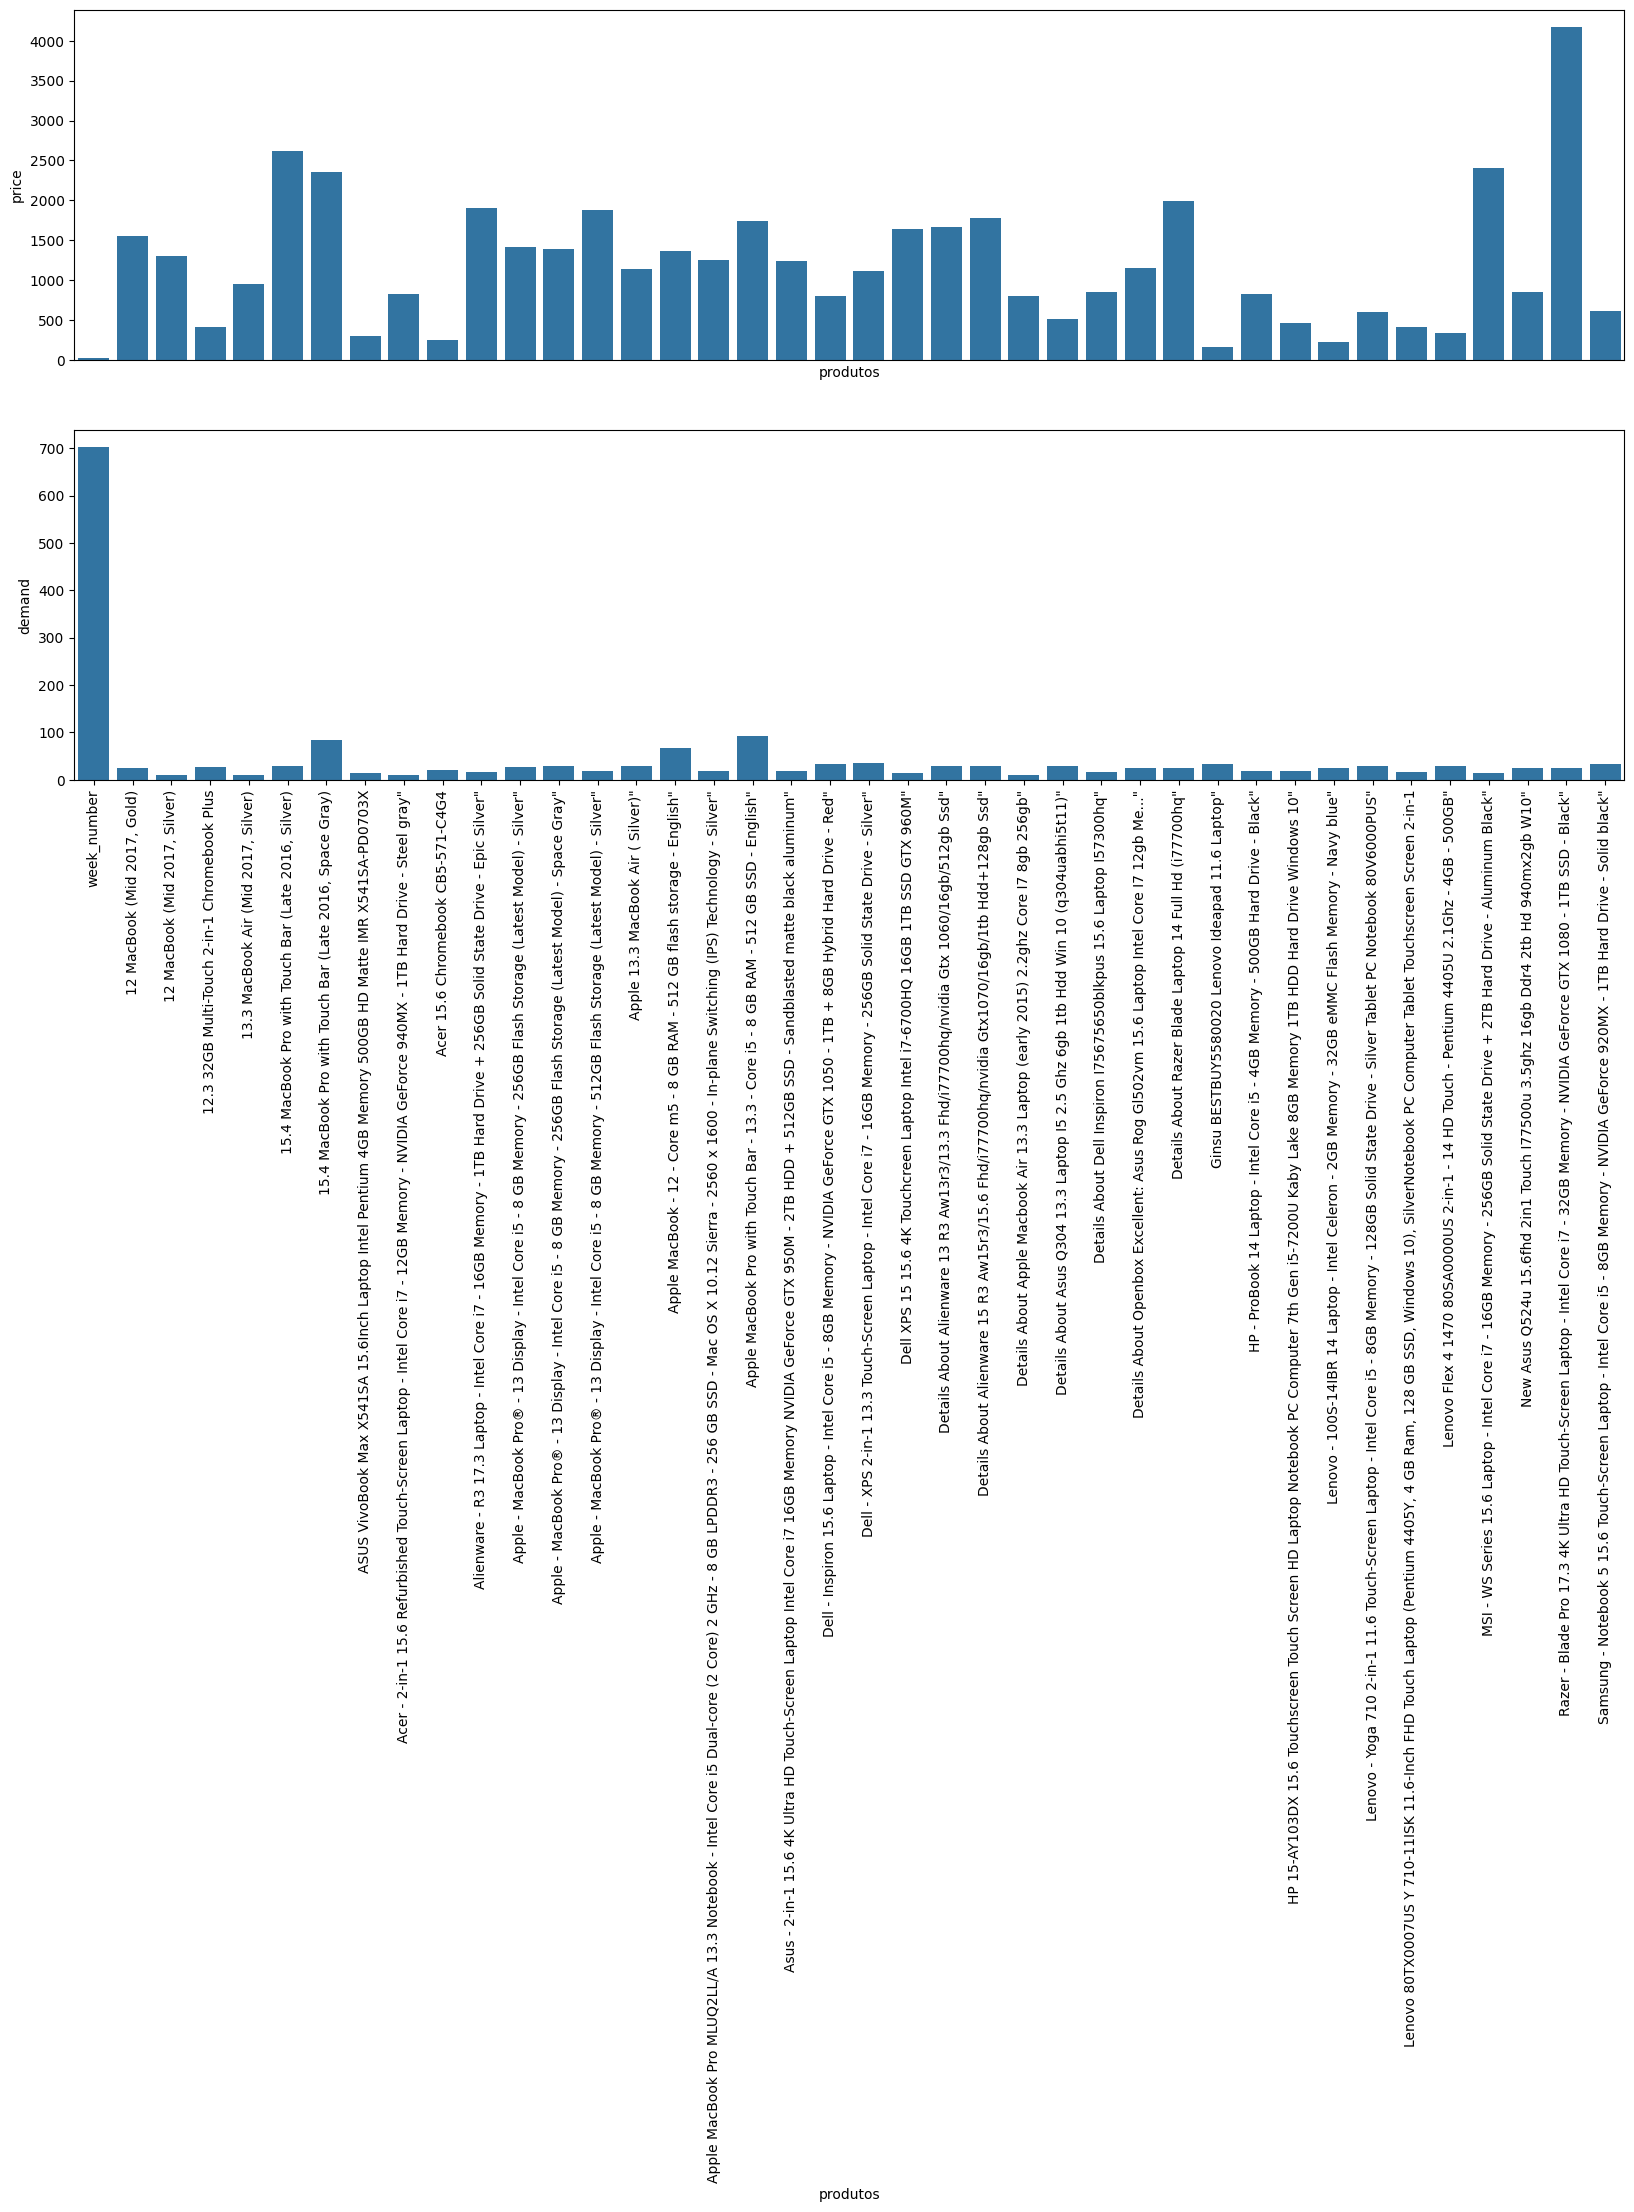

In [45]:
plt.figure( figsize=(20,10) )
plt.subplot(2, 1, 1)
aux1 = pd.DataFrame( x_price.apply( lambda x: x.median() ) ).reset_index()
aux1.columns = ['produtos', 'price']
sns.barplot( x='produtos', y='price', data=aux1);
plt.xticks([])

plt.subplot(2, 1, 2)
aux2 = pd.DataFrame( y_demand.apply( lambda x: x.sum() ) ).reset_index()
aux2.columns = ['produtos', 'demand']
plt.xticks(rotation=90)
sns.barplot( x='produtos', y='demand', data=aux2);

In [46]:
a = ['12 MacBook (Mid 2017, Gold)', '12 MacBook (Mid 2017, Silver)',
       '12.3 32GB Multi-Touch 2-in-1 Chromebook Plus',
       '13.3 MacBook Air (Mid 2017, Silver)',
       '15.4 MacBook Pro with Touch Bar (Late 2016, Silver)',
       '15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)',
       'ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X',
       'Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray"',
       'Acer 15.6 Chromebook CB5-571-C4G4',
       'Alienware - R3 17.3 Laptop - Intel Core i7 - 16GB Memory - 1TB Hard Drive + 256GB Solid State Drive - Epic Silver"',
       'Apple - MacBook Pro® - 13 Display - Intel Core i5 - 8 GB Memory - 256GB Flash Storage (Latest Model) - Silver"',
       'Apple - MacBook Pro® - 13 Display - Intel Core i5 - 8 GB Memory - 256GB Flash Storage (Latest Model) - Space Gray"',
       'Apple - MacBook Pro® - 13 Display - Intel Core i5 - 8 GB Memory - 512GB Flash Storage (Latest Model) - Silver"',
       'Apple 13.3 MacBook Air ( Silver)"',
       'Apple MacBook - 12 - Core m5 - 8 GB RAM - 512 GB flash storage - English"',
       'Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - Intel Core i5 Dual-core (2 Core) 2 GHz - 8 GB LPDDR3 - 256 GB SSD - Mac OS X 10.12 Sierra - 2560 x 1600 - In-plane Switching (IPS) Technology - Silver"',
       'Apple MacBook Pro with Touch Bar - 13.3 - Core i5 - 8 GB RAM - 512 GB SSD - English"',
       'Asus - 2-in-1 15.6 4K Ultra HD Touch-Screen Laptop Intel Core i7 16GB Memory NVIDIA GeForce GTX 950M - 2TB HDD + 512GB SSD - Sandblasted matte black aluminum"',
       'Dell - Inspiron 15.6 Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce GTX 1050 - 1TB + 8GB Hybrid Hard Drive - Red"',
       'Dell - XPS 2-in-1 13.3 Touch-Screen Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive - Silver"',
       'Dell XPS 15 15.6 4K Touchcreen Laptop Intel i7-6700HQ 16GB 1TB SSD GTX 960M"',
       'Details About Alienware 13 R3 Aw13r3/13.3 Fhd/i77700hq/nvidia Gtx 1060/16gb/512gb Ssd"',
       'Details About Alienware 15 R3 Aw15r3/15.6 Fhd/i77700hq/nvidia Gtx1070/16gb/1tb Hdd+128gb Ssd"',
       'Details About Apple Macbook Air 13.3 Laptop (early 2015) 2.2ghz Core I7 8gb 256gb"',
       'Details About Asus Q304 13.3 Laptop I5 2.5 Ghz 6gb 1tb Hdd Win 10 (q304uabhi5t11)"',
       'Details About Dell Inspiron I75675650blkpus 15.6 Laptop I57300hq"',
       'Details About Openbox Excellent: Asus Rog Gl502vm 15.6 Laptop Intel Core I7 12gb Me..."',
       'Details About Razer Blade Laptop 14 Full Hd (i77700hq"',
       'Ginsu BESTBUY5580020 Lenovo Ideapad 11.6 Laptop"',
       'HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black"',
       'HP 15-AY103DX 15.6 Touchscreen Touch Screen HD Laptop Notebook PC Computer 7th Gen i5-7200U Kaby Lake 8GB Memory 1TB HDD Hard Drive Windows 10"',
       'Lenovo - 100S-14IBR 14 Laptop - Intel Celeron - 2GB Memory - 32GB eMMC Flash Memory - Navy blue"',
       'Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - 128GB Solid State Drive - Silver Tablet PC Notebook 80V6000PUS"',
       'Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD Touch Laptop (Pentium 4405Y, 4 GB Ram, 128 GB SSD, Windows 10), SilverNotebook PC Computer Tablet Touchscreen Screen 2-in-1',
       'Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD Touch - Pentium 4405U 2.1Ghz - 4GB - 500GB"',
       'MSI - WS Series 15.6 Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive + 2TB Hard Drive - Aluminum Black"',
       'New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5ghz 16gb Ddr4 2tb Hd 940mx2gb W10"',
       'Razer - Blade Pro 17.3 4K Ultra HD Touch-Screen Laptop - Intel Core i7 - 32GB Memory - NVIDIA GeForce GTX 1080 - 1TB SSD - Black"',
       'Samsung - Notebook 5 15.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce 920MX - 1TB Hard Drive - Solid black"']

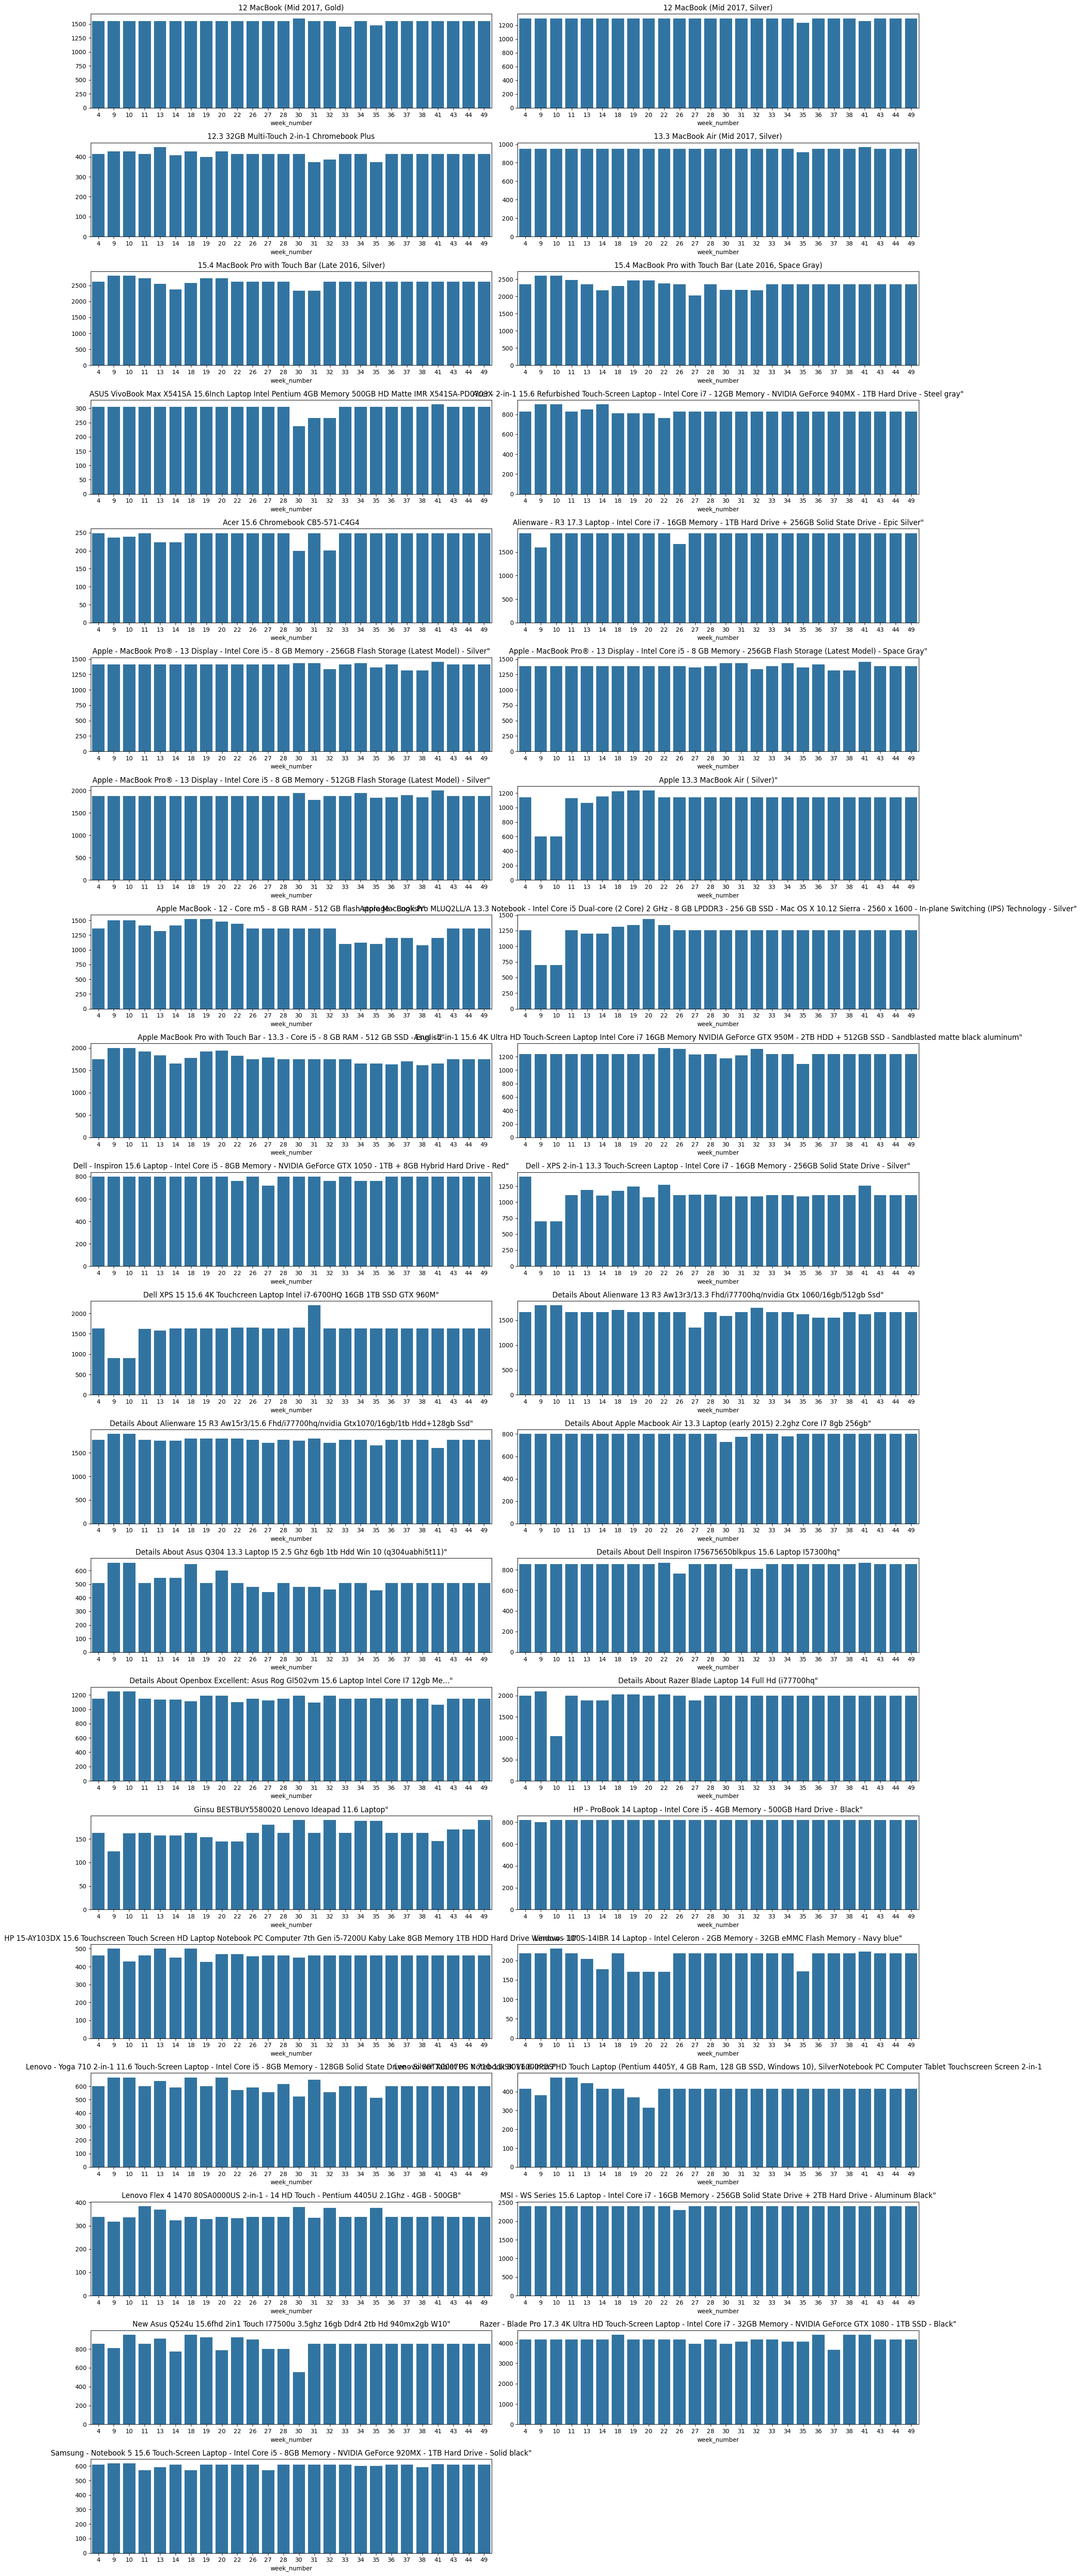

In [47]:
plt.figure( figsize=(20, 60) )
for k in np.arange( 1, len(x_price.columns), 1):
    plt.subplot(20, 2, k)
    sns.barplot( x= x_price['week_number'], y= x_price[ x_price.columns[k] ], data=x_price )
    plt.title( a[k-1] )
    plt.ylabel('')
    plt.tight_layout()

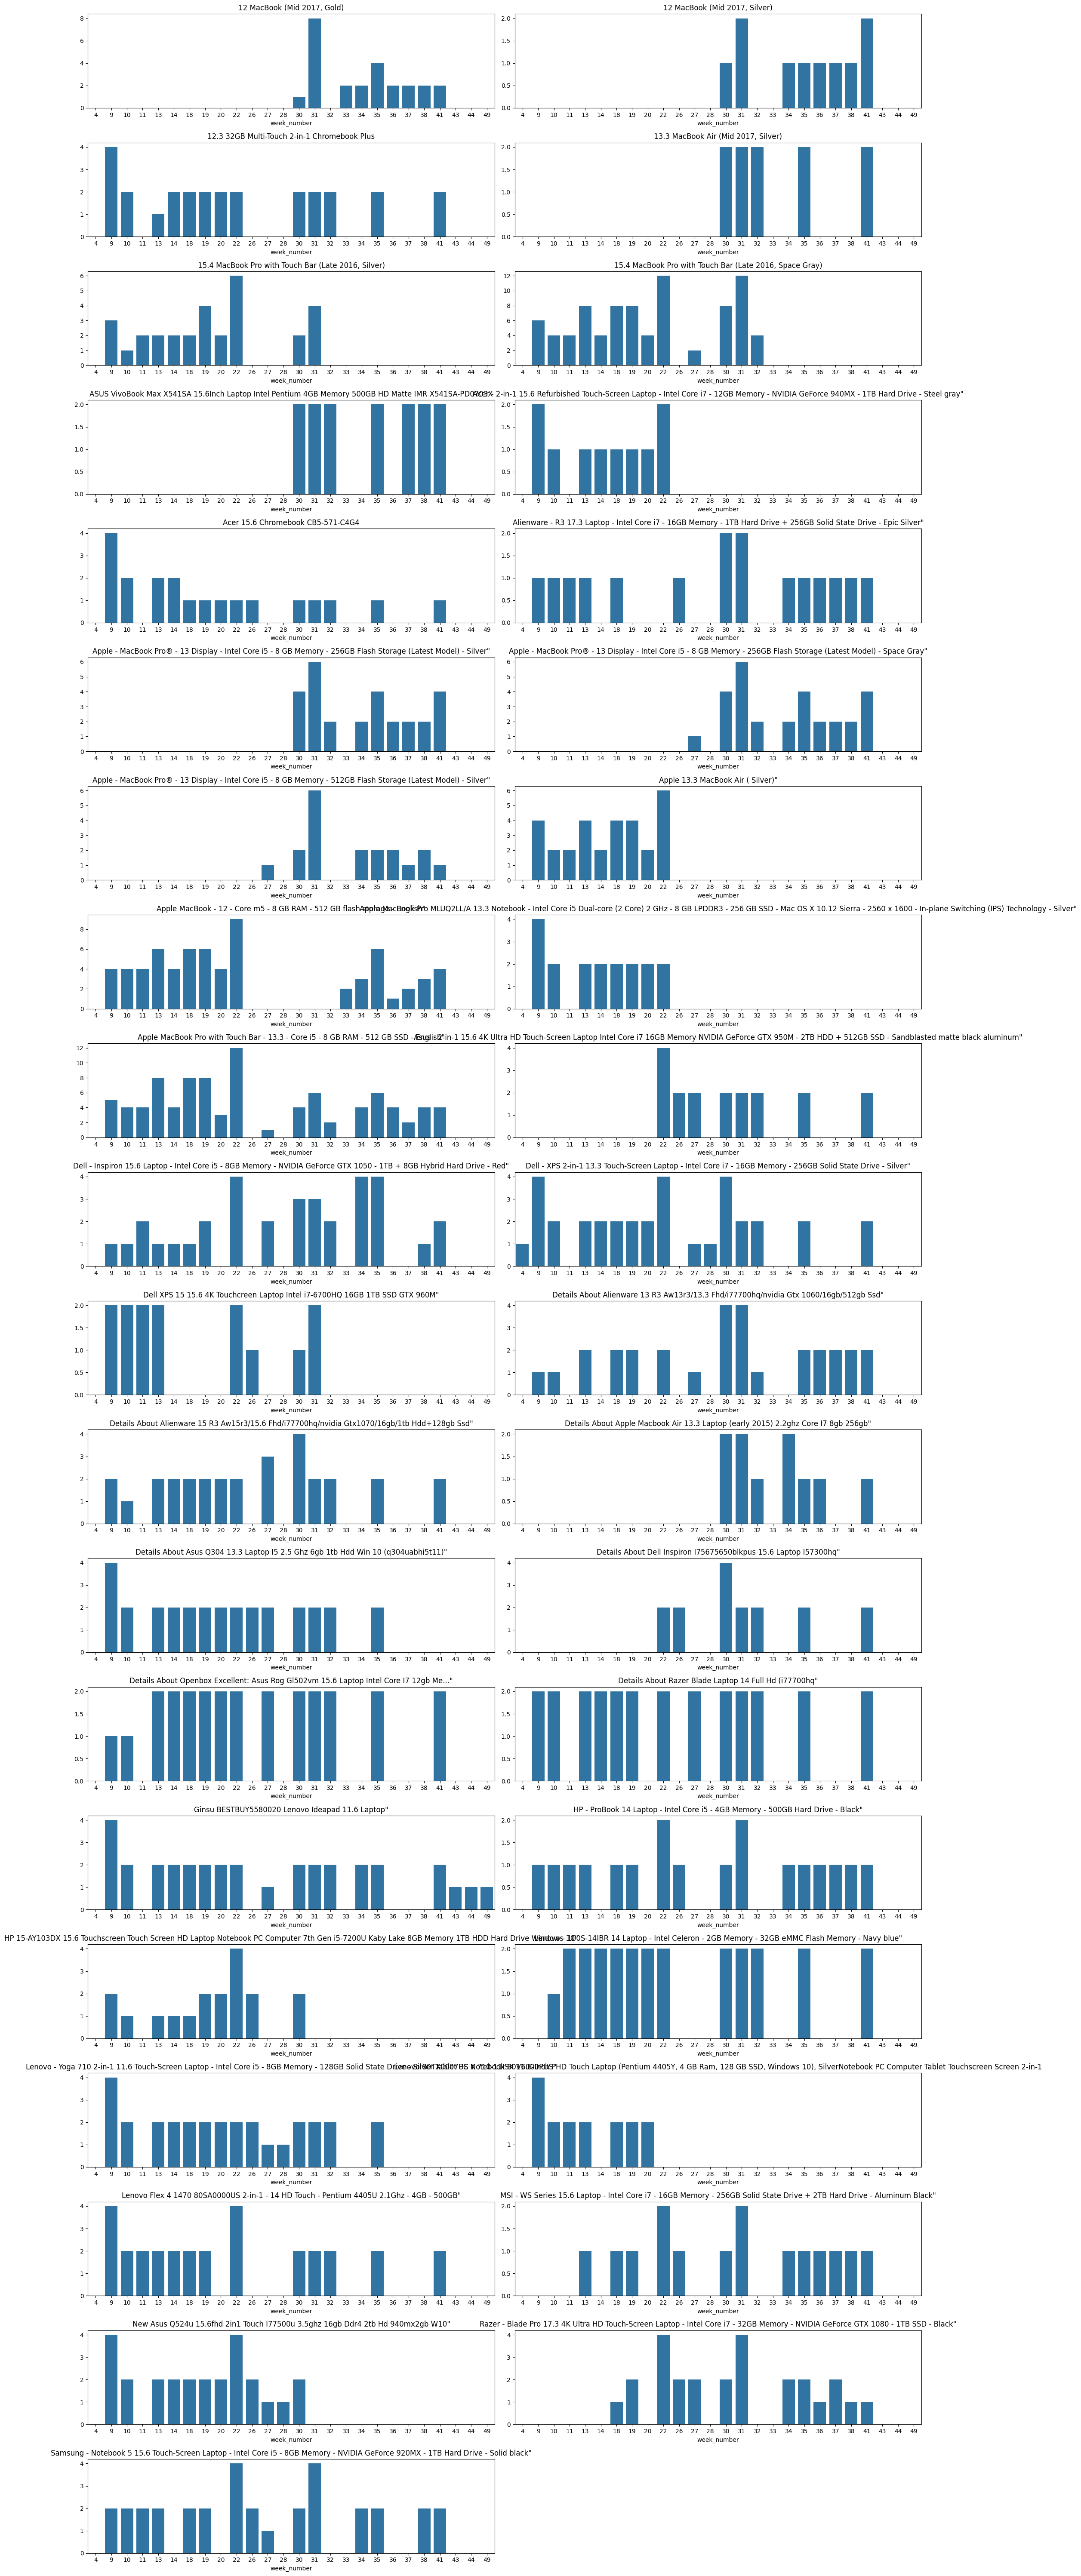

In [49]:
plt.figure( figsize=(20, 60) )
for k in np.arange( 1, len(y_demand.columns), 1):
    plt.subplot(20, 2, k)
    sns.barplot( x= y_demand['week_number'], y= y_demand[ y_demand.columns[k] ], data=y_demand )
    plt.title( a[k-1] )
    plt.ylabel('')
    plt.tight_layout()